# Part I: Preparation

## Importing Packages:

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca (principal component analysis)
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
'''
NOTE: PCA is only run on ONE concept/category at a time!! (E.g. If you run it on behaviour,
composed by Mediterranean purchases, Asian purchases, etc. you CANNOT include
regional data, such as where people live.)

NOTE: We want a normal distribution symmetry for PCA.
'''

########################################
# loading data and setting display options
########################################
# loading data
survey = pd.read_excel('./datasets/survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

## Creating UDFs for Later Use:

In [2]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

## Data Preparation:

### a) Displaying first few rows of dataset:

In [3]:
survey.head(n = 5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


#### Checking categories/responses for each feature:

In [4]:
# checking feature observations for categoricals
print(f"""
{survey['What laptop do you currently have?'].value_counts()}
\n""")

print(f"""
{survey['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()}
\n""")

print(f"""
{survey['What program are you in?'].value_counts()}
\n""")

print(f"""
{survey['Gender'].value_counts()}
\n""")

###################################################################

# correcting survey['What is your nationality? '] before calling it
survey = survey.rename(columns = {'What is your nationality? ': \
                                'What is your nationality?'})

###################################################################

# continue checking feature observations for categoricals
print(f"""
{survey['What is your nationality?'].value_counts()}
\n""")

print(f"""
{survey['What is your ethnicity?'].value_counts()}
\n""")


Macbook           69
Windows laptop    68
Name: What laptop do you currently have?, dtype: int64



Macbook           77
Windows laptop    56
Chromebook         4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64



DD (MIB & Business Analytics)       66
One year Business Analytics         36
DD (MBA & Business Analytics)       34
DD (MBA & Disruptive innovation)     1
Name: What program are you in?, dtype: int64



Male      78
Female    59
Name: Gender, dtype: int64



Indian                  18
China                    8
German                   6
Mexican                  5
Peruvian                 5
American                 3
USA                      3
Chinese                  3
Taiwan                   3
Russian                  3
Colombian                3
Norwegian                3
Brazilian                3
Nigerian                 2
Italian                  2
Indonesian               2
Brazil                   2
Russia               

#### Renaming nationalities so they can be recognized as the same answer:

In [5]:
# correcting survey['What is your nationality?'] to recognise nationalities as the same:
for index, row in survey.iterrows():
    
    # setting Ecuador
    if survey.loc[index, 'What is your nationality?'] == 'ecuador' or\
    survey.loc[index, 'What is your nationality?'] == 'Ecuadorian':
        survey.loc[index, 'What is your nationality?'] = 'Ecuador'
        
    # setting India
    elif survey.loc[index, 'What is your nationality?'] == 'indian' or\
    survey.loc[index, 'What is your nationality?'] == 'INDIAN' or\
    survey.loc[index, 'What is your nationality?'] == 'indian.' or\
    survey.loc[index, 'What is your nationality?'] == 'Indian':
        survey.loc[index, 'What is your nationality?'] = 'India'
    
    # setting China
    elif survey.loc[index, 'What is your nationality?'] == 'Chinese' or\
    survey.loc[index, 'What is your nationality?'] == 'CHINA' or\
    survey.loc[index, 'What is your nationality?'] == 'china' or\
    survey.loc[index, 'What is your nationality?'] == 'chinese':
        survey.loc[index, 'What is your nationality?'] = 'China'

    # setting Germany
    elif survey.loc[index, 'What is your nationality?'] == 'German':
        survey.loc[index, 'What is your nationality?'] = 'Germany'
    
    # setting Mexico
    elif survey.loc[index, 'What is your nationality?'] == 'Mexican' or\
    survey.loc[index, 'What is your nationality?'] == 'mexican':
        survey.loc[index, 'What is your nationality?'] = 'Mexico'
    
    # setting Peru
    elif survey.loc[index, 'What is your nationality?'] == 'Peruvian':
        survey.loc[index, 'What is your nationality?'] = 'Peru'
    
    # setting USA
    elif survey.loc[index, 'What is your nationality?'] == 'American':
        survey.loc[index, 'What is your nationality?'] = 'USA'
    
    # setting Norway
    elif survey.loc[index, 'What is your nationality?'] == 'Norwegian':
        survey.loc[index, 'What is your nationality?'] = 'Norway'
    
    # setting Russia
    elif survey.loc[index, 'What is your nationality?'] == 'Russian':
        survey.loc[index, 'What is your nationality?'] = 'Russia'
    
    # setting Brazil
    elif survey.loc[index, 'What is your nationality?'] == 'Brazilian':
        survey.loc[index, 'What is your nationality?'] = 'Brazil'
    
    # setting Colombia
    elif survey.loc[index, 'What is your nationality?'] == 'Colombian' or\
    survey.loc[index, 'What is your nationality?'] == 'colombian':
        survey.loc[index, 'What is your nationality?'] = 'Colombia'
    
    # setting Korea
    elif survey.loc[index, 'What is your nationality?'] == 'Republic of Korea' or\
    survey.loc[index, 'What is your nationality?'] == 'South Korea':
        survey.loc[index, 'What is your nationality?'] = 'Korea'
    
    # setting Spain
    elif survey.loc[index, 'What is your nationality?'] == 'Spanish':
        survey.loc[index, 'What is your nationality?'] = 'Spain'
    
    # setting Italy
    elif survey.loc[index, 'What is your nationality?'] == 'Italian' or\
    survey.loc[index, 'What is your nationality?'] == 'italian':
        survey.loc[index, 'What is your nationality?'] = 'Italy'
    
    # setting Nigeria
    elif survey.loc[index, 'What is your nationality?'] == 'Nigerian' or\
    survey.loc[index, 'What is your nationality?'] == 'nigerian':
        survey.loc[index, 'What is your nationality?'] = 'Nigeria'
    
    # setting Turkey
    elif survey.loc[index, 'What is your nationality?'] == 'Turkish':
        survey.loc[index, 'What is your nationality?'] = 'Turkey'
    
    # setting Vietnam
    elif survey.loc[index, 'What is your nationality?'] == 'Vietnamese':
        survey.loc[index, 'What is your nationality?'] = 'Vietnam'
    
    # setting Thailand
    elif survey.loc[index, 'What is your nationality?'] == 'Thai':
        survey.loc[index, 'What is your nationality?'] = 'Thailand'
    
    # setting Indonesia
    elif survey.loc[index, 'What is your nationality?'] == 'Indonesian':
        survey.loc[index, 'What is your nationality?'] = 'Indonesia'
    
    # setting Philippines
    elif survey.loc[index, 'What is your nationality?'] == 'Filipino ':
        survey.loc[index, 'What is your nationality?'] = 'Philippines'
    
    # setting Congo
    elif survey.loc[index, 'What is your nationality?'] == 'Congolese (DR CONGO)' or\
    survey.loc[index, 'What is your nationality?'] == 'Congolese':
        survey.loc[index, 'What is your nationality?'] = 'Congo'
    
    # setting Ukraine
    elif survey.loc[index, 'What is your nationality?'] == 'Ukrainian':
        survey.loc[index, 'What is your nationality?'] = 'Ukraine'
    
    # setting Ghana
    elif survey.loc[index, 'What is your nationality?'] == 'Ghanaian':
        survey.loc[index, 'What is your nationality?'] = 'Ghana'

    # setting Uganda
    elif survey.loc[index, 'What is your nationality?'] == 'Ugandan':
        survey.loc[index, 'What is your nationality?'] = 'Uganda'
    
    # setting UK
    elif survey.loc[index, 'What is your nationality?'] == 'British':
        survey.loc[index, 'What is your nationality?'] = 'UK'
    
    # setting Switzerland
    elif survey.loc[index, 'What is your nationality?'] == 'Swiss':
        survey.loc[index, 'What is your nationality?'] = 'Switzerland'
    
    # setting Pakistan
    elif survey.loc[index, 'What is your nationality?'] == 'Pakistani':
        survey.loc[index, 'What is your nationality?'] = 'Pakistan'
    
    # setting Britain, India
    elif survey.loc[index, 'What is your nationality?'] == 'British, Indian':
        survey.loc[index, 'What is your nationality?'] = 'Britain, India'
    
    # setting Belgium
    elif survey.loc[index, 'What is your nationality?'] == 'Belgian ':
        survey.loc[index, 'What is your nationality?'] = 'Belgium'
    
    # setting Czech Republic
    elif survey.loc[index, 'What is your nationality?'] == 'Czech':
        survey.loc[index, 'What is your nationality?'] = 'Czech Republic'
    
    # setting Kenya
    elif survey.loc[index, 'What is your nationality?'] == 'Kenyan':
        survey.loc[index, 'What is your nationality?'] = 'Kenya'
    
    # setting Portugal
    elif survey.loc[index, 'What is your nationality?'] == 'Portuguese':
        survey.loc[index, 'What is your nationality?'] = 'Portugal'
    
    # setting Dominican Republic
    elif survey.loc[index, 'What is your nationality?'] == 'Dominican' or\
    survey.loc[index, 'What is your nationality?'] == 'Dominican ':
        survey.loc[index, 'What is your nationality?'] = 'Dominican Republic'
    
    # setting Costa Rica
    elif survey.loc[index, 'What is your nationality?'] == 'Costarrican':
        survey.loc[index, 'What is your nationality?'] = 'Costa Rica'
    
    # setting Italy, Spain
    elif survey.loc[index, 'What is your nationality?'] == 'Italian and Spanish':
        survey.loc[index, 'What is your nationality?'] = 'Italy, Spain'
    
    # setting N/A
    elif survey.loc[index, 'What is your nationality?'] == 'prefer not to answer':
        survey.loc[index, 'What is your nationality?'] = 'N/A'
    
    # setting Venezuela
    elif survey.loc[index, 'What is your nationality?'] == 'Venezuelan':
        survey.loc[index, 'What is your nationality?'] = 'Venezuela'
    
    # setting Canada
    elif survey.loc[index, 'What is your nationality?'] == 'canadian':
        survey.loc[index, 'What is your nationality?'] = 'Canada'
    
    # setting Germany, USA
    elif survey.loc[index, 'What is your nationality?'] == 'German/American':
        survey.loc[index, 'What is your nationality?'] = 'Germany, USA'
    
    # NOTE: keeping double nationalities as separate categories


    
# checking results:
print(f"""
{survey['What is your nationality?'].value_counts()}
\n""")


India                 22
China                 14
Germany                7
Mexico                 6
USA                    6
Peru                   6
Colombia               5
Brazil                 5
Russia                 5
Korea                  4
Nigeria                4
Taiwan                 3
Italy                  3
Ecuador                3
Norway                 3
Indonesia              3
Dominican Republic     2
Philippines            2
Canada                 2
Vietnam                2
Thailand               2
Congo                  2
Czech Republic         2
Turkey                 2
Spain                  2
Portugal               1
Germany, USA           1
Switzerland            1
Pakistan               1
Britain, India         1
Ghana                  1
Mauritius              1
N/A                    1
Kyrgyz                 1
Costa Rica             1
Italy, Spain           1
Kenya                  1
UK                     1
Ukraine                1
Belgium                1

#### Coding categorical variables as numerical:

In [6]:
#############################################################
# 'What laptop do you currently have?'
#############################################################

# checking feature observation types
print(f"""
BEFORE:
{survey['What laptop do you currently have?'].value_counts()}
""")


'''
NOTE: 'Macbook' = 1, 'Windows laptop' = 0
'''


# iterating through column to change values
for index, row in survey.iterrows():
    
    # changing 'Macbook' to 1
    if survey.loc[index, 'What laptop do you currently have?'] == 'Macbook':
        survey.loc[index, 'What laptop do you currently have?'] = 1
    
    # changing 'Windows laptop' to 0
    elif survey.loc[index, 'What laptop do you currently have?'] == 'Windows laptop':
        survey.loc[index, 'What laptop do you currently have?'] = 0

        
# checking results
print(f"""
AFTER:
{survey['What laptop do you currently have?'].value_counts()}
----------""")




#############################################################
# 'What laptop would you buy in next assuming if all laptops cost the same?'
#############################################################

# checking feature observation types
print(f"""
BEFORE:
{survey['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()}
""")


'''
NOTE: 'Chromebook' = 2, 'Macbook' = 1, 'Windows laptop' = 0
'''


# iterating through column to change values
for index, row in survey.iterrows():
    
    # changing 'Macbook' to 1
    if survey.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] \
    == 'Macbook':
        survey.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] \
        = 1
    
    # changing 'Windows laptop' to 0
    elif survey.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] \
    == 'Windows laptop':
        survey.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] \
        = 0
    
    # changing 'Chromebook' to 2
    elif survey.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] \
    == 'Chromebook':
        survey.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] \
        = 2

        
# checking results
print(f"""
AFTER:
{survey['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()}
----------""")




#############################################################
# 'What program are you in?'
#############################################################

# checking feature observation types
print(f"""
BEFORE:
{survey['What program are you in?'].value_counts()}
""")


'''
NOTE: 
'DD (MIB & Business Analytics)'    = 1, 
'One year Business Analytics'      = 2,
'DD (MBA & Business Analytics)'    = 3,
'DD (MBA & Disruptive innovation)' = 4

'''


# iterating through column to change values
for index, row in survey.iterrows():
    
    # changing 'DD (MIB & Business Analytics)' to 1
    if survey.loc[index, 'What program are you in?'] == 'DD (MIB & Business Analytics)':
        survey.loc[index, 'What program are you in?'] = 1
    
    # changing 'One year Business Analytics' to 2
    elif survey.loc[index, 'What program are you in?'] == 'One year Business Analytics':
        survey.loc[index, 'What program are you in?'] = 2
    
    # changing 'DD (MBA & Business Analytics)' to 3
    elif survey.loc[index, 'What program are you in?'] == 'DD (MBA & Business Analytics)':
        survey.loc[index, 'What program are you in?'] = 3
    
    # changing 'DD (MBA & Disruptive innovation)' to 4
    elif survey.loc[index, 'What program are you in?'] == 'DD (MBA & Disruptive innovation)':
        survey.loc[index, 'What program are you in?'] = 4

        
# checking results
print(f"""
AFTER:
{survey['What program are you in?'].value_counts()}
----------""")




#############################################################
# 'Gender'
#############################################################

# checking feature observation types
print(f"""
BEFORE:
{survey['Gender'].value_counts()}
""")


'''
NOTE: 'Male' = 0, 'Female' = 1

'''


# iterating through column to change values
for index, row in survey.iterrows():
    
    # changing 'Male' to 0
    if survey.loc[index, 'Gender'] == 'Male':
        survey.loc[index, 'Gender'] = 0
    
    # changing 'Female' to 1
    elif survey.loc[index, 'Gender'] == 'Female':
        survey.loc[index, 'Gender'] = 1
    
        
# checking results
print(f"""
AFTER:
{survey['Gender'].value_counts()}
----------""")




#############################################################
# 'What is your nationality?'
#############################################################

# checking feature observation types
print(f"""
BEFORE:
{survey['What is your nationality?'].value_counts()}
""")


'''
NOTE: 
India              = 1
China              = 2
Germany            = 3
USA                = 4
Mexico             = 5
Peru               = 6
Brazil             = 7
Russia             = 8
Colombia           = 9
Nigeria            = 10
Korea              = 11
Taiwan             = 12
Italy              = 13
Ecuador            = 14
Norway             = 15
Indonesia          = 16
Vietnam            = 17
Czech Republic     = 18
Thailand           = 19
Dominican Republic = 20
Congo              = 21
Spain              = 22
Canada             = 23
Philippines        = 24
Turkey             = 25
Venezuela          = 26
Italy, Spain       = 27
N/A                = 28
Britain, India     = 29
Portugal           = 30
Kyrgyz             = 31
Germany, USA       = 32
Costa Rica         = 33
Belgium            = 34
Belarus            = 35
Panama             = 36
UK                 = 37
Kenya              = 38
Switzerland        = 39
Ukraine            = 40
Pakistan           = 41
Mauritius          = 42
Uganda             = 43
Ghana              = 44
Japan              = 45
'''


# iterating through column to change values
for index, row in survey.iterrows():
    
    # changing 'India' to 1
    if survey.loc[index, 'What is your nationality?'] == 'India':
        survey.loc[index, 'What is your nationality?'] = 1
    
    # changing 'China' to 2
    elif survey.loc[index, 'What is your nationality?'] == 'China':
        survey.loc[index, 'What is your nationality?'] = 2
    
    # changing 'Germany' to 3
    elif survey.loc[index, 'What is your nationality?'] == 'Germany':
        survey.loc[index, 'What is your nationality?'] = 3
    
    # changing 'USA' to 4
    elif survey.loc[index, 'What is your nationality?'] == 'USA':
        survey.loc[index, 'What is your nationality?'] = 4
    
    # changing 'Mexico' to 5
    elif survey.loc[index, 'What is your nationality?'] == 'Mexico':
        survey.loc[index, 'What is your nationality?'] = 5
    
    # changing 'Peru' to 6
    elif survey.loc[index, 'What is your nationality?'] == 'Peru':
        survey.loc[index, 'What is your nationality?'] = 6
    
    # changing 'Brazil' to 7
    elif survey.loc[index, 'What is your nationality?'] == 'Brazil':
        survey.loc[index, 'What is your nationality?'] = 7
    
    # changing 'Russia' to 8
    elif survey.loc[index, 'What is your nationality?'] == 'Russia':
        survey.loc[index, 'What is your nationality?'] = 8
    
    # changing 'Colombia' to 9
    elif survey.loc[index, 'What is your nationality?'] == 'Colombia':
        survey.loc[index, 'What is your nationality?'] = 9
    
    # changing 'Nigeria' to 10
    elif survey.loc[index, 'What is your nationality?'] == 'Nigeria':
        survey.loc[index, 'What is your nationality?'] = 10
    
    # changing 'Korea' to 11
    elif survey.loc[index, 'What is your nationality?'] == 'Korea':
        survey.loc[index, 'What is your nationality?'] = 11
    
    # changing 'Taiwan' to 12
    elif survey.loc[index, 'What is your nationality?'] == 'Taiwan':
        survey.loc[index, 'What is your nationality?'] = 12
    
    # changing 'Italy' to 13
    elif survey.loc[index, 'What is your nationality?'] == 'Italy':
        survey.loc[index, 'What is your nationality?'] = 13
    
    # changing 'Ecuador' to 14
    elif survey.loc[index, 'What is your nationality?'] == 'Ecuador':
        survey.loc[index, 'What is your nationality?'] = 14
    
    # changing 'Norway' to 15
    elif survey.loc[index, 'What is your nationality?'] == 'Norway':
        survey.loc[index, 'What is your nationality?'] = 15
    
    # changing 'Indonesia' to 16
    elif survey.loc[index, 'What is your nationality?'] == 'Indonesia':
        survey.loc[index, 'What is your nationality?'] = 16
    
    # changing 'Vietnam' to 17
    elif survey.loc[index, 'What is your nationality?'] == 'Vietnam':
        survey.loc[index, 'What is your nationality?'] = 17
    
    # changing 'Czech Republic' to 18
    elif survey.loc[index, 'What is your nationality?'] == 'Czech Republic':
        survey.loc[index, 'What is your nationality?'] = 18
    
    # changing 'Thailand' to 19
    elif survey.loc[index, 'What is your nationality?'] == 'Thailand':
        survey.loc[index, 'What is your nationality?'] = 19
    
    # changing 'Dominican Republic' to 20
    elif survey.loc[index, 'What is your nationality?'] == 'Dominican Republic':
        survey.loc[index, 'What is your nationality?'] = 20
    
    # changing 'Congo' to 21
    elif survey.loc[index, 'What is your nationality?'] == 'Congo':
        survey.loc[index, 'What is your nationality?'] = 21
    
    # changing 'Spain' to 22
    elif survey.loc[index, 'What is your nationality?'] == 'Spain':
        survey.loc[index, 'What is your nationality?'] = 22
    
    # changing 'Canada' to 23
    elif survey.loc[index, 'What is your nationality?'] == 'Canada':
        survey.loc[index, 'What is your nationality?'] = 23
    
    # changing 'Philippines' to 24
    elif survey.loc[index, 'What is your nationality?'] == 'Philippines':
        survey.loc[index, 'What is your nationality?'] = 24
    
    # changing 'Turkey' to 25
    elif survey.loc[index, 'What is your nationality?'] == 'Turkey':
        survey.loc[index, 'What is your nationality?'] = 25
    
    # changing 'Venezuela' to 26
    elif survey.loc[index, 'What is your nationality?'] == 'Venezuela':
        survey.loc[index, 'What is your nationality?'] = 26
    
    # changing 'Italy, Spain' to 27
    elif survey.loc[index, 'What is your nationality?'] == 'Italy, Spain':
        survey.loc[index, 'What is your nationality?'] = 27
    
    # changing 'N/A' to 28
    elif survey.loc[index, 'What is your nationality?'] == 'N/A':
        survey.loc[index, 'What is your nationality?'] = 28
    
    # changing 'Britain, India' to 29
    elif survey.loc[index, 'What is your nationality?'] == 'Britain, India':
        survey.loc[index, 'What is your nationality?'] = 29
    
    # changing 'Portugal' to 30
    elif survey.loc[index, 'What is your nationality?'] == 'Portugal':
        survey.loc[index, 'What is your nationality?'] = 30
    
    # changing 'Kyrgyz' to 31
    elif survey.loc[index, 'What is your nationality?'] == 'Kyrgyz':
        survey.loc[index, 'What is your nationality?'] = 31
    
    # changing 'Germany, USA' to 32
    elif survey.loc[index, 'What is your nationality?'] == 'Germany, USA':
        survey.loc[index, 'What is your nationality?'] = 32
    
    # changing 'Costa Rica' to 33
    elif survey.loc[index, 'What is your nationality?'] == 'Costa Rica':
        survey.loc[index, 'What is your nationality?'] = 33
    
    # changing 'Belgium' to 34
    elif survey.loc[index, 'What is your nationality?'] == 'Belgium':
        survey.loc[index, 'What is your nationality?'] = 34
    
    # changing 'Belarus' to 35
    elif survey.loc[index, 'What is your nationality?'] == 'Belarus':
        survey.loc[index, 'What is your nationality?'] = 35
    
    # changing 'Panama' to 36
    elif survey.loc[index, 'What is your nationality?'] == 'Panama':
        survey.loc[index, 'What is your nationality?'] = 36
    
    # changing 'UK' to 37
    elif survey.loc[index, 'What is your nationality?'] == 'UK':
        survey.loc[index, 'What is your nationality?'] = 37
    
    # changing 'Kenya' to 38
    elif survey.loc[index, 'What is your nationality?'] == 'Kenya':
        survey.loc[index, 'What is your nationality?'] = 38
    
    # changing 'Switzerland' to 39
    elif survey.loc[index, 'What is your nationality?'] == 'Switzerland':
        survey.loc[index, 'What is your nationality?'] = 39
    
    # changing 'Ukraine' to 40
    elif survey.loc[index, 'What is your nationality?'] == 'Ukraine':
        survey.loc[index, 'What is your nationality?'] = 40
    
    # changing 'Pakistan' to 41
    elif survey.loc[index, 'What is your nationality?'] == 'Pakistan':
        survey.loc[index, 'What is your nationality?'] = 41
    
    # changing 'Mauritius' to 42
    elif survey.loc[index, 'What is your nationality?'] == 'Mauritius':
        survey.loc[index, 'What is your nationality?'] = 42
    
    # changing 'Uganda' to 43
    elif survey.loc[index, 'What is your nationality?'] == 'Uganda':
        survey.loc[index, 'What is your nationality?'] = 43
    
    # changing 'Ghana' to 44
    elif survey.loc[index, 'What is your nationality?'] == 'Ghana':
        survey.loc[index, 'What is your nationality?'] = 44
    
    # changing 'Japan' to 45
    elif survey.loc[index, 'What is your nationality?'] == 'Japan':
        survey.loc[index, 'What is your nationality?'] = 45
        

        
# checking results
print(f"""
AFTER:
{survey['What is your nationality?'].value_counts()}
----------""")




#############################################################
# 'What is your ethnicity?'
#############################################################

# checking feature observation types
print(f"""
BEFORE:
{survey['What is your ethnicity?'].value_counts()}
""")


'''
NOTE: 
'Hispanic / Latino'    = 1
'West Asian / Indian'  = 2
'White / Caucasian'    = 3
'Far east Asian'       = 4
'Prefer not to answer' = 5
'African American'     = 6
'Middle Eastern'       = 7
'Native American'      = 8
'''


# iterating through column to change values
for index, row in survey.iterrows():
    
    # changing 'Hispanic / Latino' to 1
    if survey.loc[index, 'What is your ethnicity?'] == 'Hispanic / Latino':
        survey.loc[index, 'What is your ethnicity?'] = 1
    
    # changing 'West Asian / Indian' to 2
    elif survey.loc[index, 'What is your ethnicity?'] == 'West Asian / Indian':
        survey.loc[index, 'What is your ethnicity?'] = 2
    
    # changing 'White / Caucasian' to 3
    elif survey.loc[index, 'What is your ethnicity?'] == 'White / Caucasian':
        survey.loc[index, 'What is your ethnicity?'] = 3
    
    # changing 'Far east Asian' to 4
    elif survey.loc[index, 'What is your ethnicity?'] == 'Far east Asian': 
        survey.loc[index, 'What is your ethnicity?'] = 4
    
    # changing 'Prefer not to answer' to 5
    elif survey.loc[index, 'What is your ethnicity?'] == 'Prefer not to answer':
        survey.loc[index, 'What is your ethnicity?'] = 5
    
    # changing 'African American' to 6
    elif survey.loc[index, 'What is your ethnicity?'] == 'African American':
        survey.loc[index, 'What is your ethnicity?'] = 6
    
    # changing 'Middle Eastern' to 7
    elif survey.loc[index, 'What is your ethnicity?'] == 'Middle Eastern': 
        survey.loc[index, 'What is your ethnicity?'] = 7
    
    # changing 'Native American' to 8
    elif survey.loc[index, 'What is your ethnicity?'] == 'Native American': 
        survey.loc[index, 'What is your ethnicity?'] = 8
    
    
# checking results
print(f"""
AFTER:
{survey['What is your ethnicity?'].value_counts()}
----------""")




#############################################################
# 'What is your age?'
#############################################################

# calculating age mean
age_mean = survey.loc[index, 'What is your age?'].mean()

# coding dummy variable for 'What is your age?'
# looping through rows
for index, row in survey.iterrows():
    
    '''
    NOTE: 
    Below average              = 0
    Above or queal to average  = 1
    '''
    
    # coding below average as 0
    if survey.loc[index, 'What is your age?'] < age_mean:
        
        survey.loc[index, 'What is your age?'] = 0
    
    # coding below average as 0
    elif survey.loc[index, 'What is your age?'] >= age_mean:
        
        survey.loc[index, 'What is your age?'] = 1
    




BEFORE:
Macbook           69
Windows laptop    68
Name: What laptop do you currently have?, dtype: int64


AFTER:
1    69
0    68
Name: What laptop do you currently have?, dtype: int64
----------

BEFORE:
Macbook           77
Windows laptop    56
Chromebook         4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64


AFTER:
1    77
0    56
2     4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64
----------

BEFORE:
DD (MIB & Business Analytics)       66
One year Business Analytics         36
DD (MBA & Business Analytics)       34
DD (MBA & Disruptive innovation)     1
Name: What program are you in?, dtype: int64


AFTER:
1    66
2    36
3    34
4     1
Name: What program are you in?, dtype: int64
----------

BEFORE:
Male      78
Female    59
Name: Gender, dtype: int64


AFTER:
0    78
1    59
Name: Gender, dtype: int64
----------

BEFORE:
India                 22
China                 14
Germany   

#### Creating different dataframes for feature categories:

In [7]:
survey.head(n = 10)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,1,1,1,1,1,14,1
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,0,0,2,1,0,14,1
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,0,0,2,1,0,1,2
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,0,0,2,1,1,1,2
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,1,0,4,1,0,2,4
5,10005,3,2,2,5,2,2,4,2,3,2,2,2,4,5,3,4,4,4,2,3,2,2,2,4,3,4,4,3,3,2,2,2,3,4,4,4,4,3,3,3,3,4,2,4,4,4,3,3,4,3,4,2,3,4,4,3,3,4,3,3,4,4,3,4,3,2,3,3,5,3,4,1,1,1,0,0,1,2
6,10006,3,4,4,5,3,4,4,3,2,1,2,2,4,4,3,3,4,3,3,2,2,2,1,4,4,3,4,2,4,2,4,2,3,3,4,1,4,3,3,2,3,4,4,4,3,5,4,3,3,3,4,3,4,5,4,3,4,4,4,4,4,2,4,5,4,4,5,4,5,4,5,0,1,1,0,1,20,1
7,10007,3,5,4,2,4,1,4,1,3,1,5,1,5,3,3,2,4,2,4,2,4,2,3,2,4,2,4,3,2,2,3,2,4,2,4,2,4,2,1,3,4,4,4,1,5,3,4,4,1,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,1,5,4,4,4,4,0,0,1,1,1,39,3
8,10008,1,3,5,4,2,3,3,1,4,3,3,1,5,3,4,3,3,2,3,2,4,2,3,4,3,2,3,2,2,3,3,4,2,3,4,4,3,3,2,2,2,4,4,2,3,4,4,4,2,3,4,4,4,4,4,3,4,4,3,4,4,3,4,4,4,2,4,4,4,4,4,1,1,3,1,0,45,4
9,10009,3,4,5,4,4,4,3,1,2,1,4,2,5,3,4,2,3,1,1,1,3,2,4

In [8]:
for name in survey.columns:
    print(name)

surveyID
Am the life of the party
Feel little concern for others
Am always prepared
Get stressed out easily
Have a rich vocabulary
Don't talk a lot
Am interested in people
Leave my belongings around
Am relaxed most of the time
Have difficulty understanding abstract ideas
Feel comfortable around people
Insult people
Pay attention to details
Worry about things
Have a vivid imagination
Keep in the background
Sympathize with others' feelings
Make a mess of things
Seldom feel blue
Am not interested in abstract ideas
Start conversations
Am not interested in other people's problems
Get chores done right away
Am easily disturbed
Have excellent ideas
Have little to say
Have a soft heart
Often forget to put things back in their proper place
Get upset easily
Do not have a good imagination
Talk to a lot of different people at parties
Am not really interested in others
Like order
Change my mood a lot
Am quick to understand things
Don't like to draw attention to myself
Take time out for others
Shirk

In [9]:
# classifying variables into categories:

# instantiating categorical variables
survey_categorical = survey.loc[:, ['surveyID']]


# instantiating demographic variables
survey_demographic = survey.loc[:, ['What laptop do you currently have?',
                'What laptop would you buy in next assuming if all laptops cost the same?',
                'What program are you in?', 'What is your age?', 'Gender',
                'What is your nationality?', 'What is your ethnicity?']]
    
    
# creating df with only PERSONALITY features
survey_personality = survey.loc[:, ['Am the life of the party',
                     'Feel little concern for others',
                     'Am always prepared',
                     'Get stressed out easily',
                     'Have a rich vocabulary',
                     'Don\'t talk a lot',
                     'Am interested in people',
                     'Leave my belongings around',
                     'Am relaxed most of the time',
                     'Have difficulty understanding abstract ideas',
                     'Feel comfortable around people',
                     'Insult people',
                     'Pay attention to details',
                     'Worry about things',
                     'Have a vivid imagination',
                     'Keep in the background',
                     'Sympathize with others\' feelings',
                     'Make a mess of things',
                     'Seldom feel blue',
                     'Am not interested in abstract ideas',
                     'Start conversations',
                     'Am not interested in other people\'s problems',
                     'Get chores done right away',
                     'Am easily disturbed',
                     'Have excellent ideas',
                     'Have little to say',
                     'Have a soft heart',
                     'Often forget to put things back in their proper place',
                     'Get upset easily',
                     'Do not have a good imagination',
                     'Talk to a lot of different people at parties',
                     'Am not really interested in others',
                     'Like order',
                     'Change my mood a lot',
                     'Am quick to understand things',
                     'Don\'t like to draw attention to myself',
                     'Take time out for others',
                     'Shirk my duties',
                     'Have frequent mood swings',
                     'Use difficult words',
                     'Don\'t mind being the center of attention',
                     'Feel others\' emotions',
                     'Follow a schedule',
                     'Get irritated easily',
                     'Spend time reflecting on things',
                     'Am quiet around strangers',
                     'Make people feel at ease',
                     'Am exacting in my work',
                     'Often feel blue',
                     'Am full of ideas',
                     'See underlying patterns in complex situations',
                     'Don\'t  generate ideas that are new and different', # NOTE double spacing after don't !!!
                     'Demonstrate an awareness of personal strengths and limitations',
                     'Display a growth mindset',
                     'Respond effectively to multiple priorities',
                     'Take initiative even when circumstances, objectives, or rules aren\'t clear',
                     'Encourage direct and open discussions',
                     'Listen carefully to others',
                     'Don\'t persuasively sell a vision or idea',
                     'Build cooperative relationships',
                     'Work well with people from diverse cultural backgrounds',
                     'Effectively negotiate interests, resources, and roles',
                     'Can\'t rally people on the team around a common goal',
                     'Translate ideas into plans that are organized and realistic',
                     'Resolve conflicts constructively',
                     'Seek and use feedback from teammates',
                     'Coach teammates for performance and growth',
                     'Drive for results']]



#### Finding duplicates/reversed features:

----------
DUPLICATES:

- 'Take initiative even when circumstances, objectives, or rules aren't clear' ***
- 'Take initiative even when circumstances, objectives, or rules aren't clear.1' ***

- 'Respond effectively to multiple priorities' ***
- 'Respond effectively to multiple priorities.1' ***

- 'Encourage direct and open discussions' ***
- 'Encourage direct and open discussions.1' ***


----------
REVERSED FEATURES (BIG FIVE):

**EXTRAVERSION: 
- 'Am the life of the party'
- 'Don't mind being the center of attention'
- 'Feel comfortable around people'
- 'Talk to a lot of different people at parties'
- 'Start conversations'  

//VS//  

- 'Keep in the background'
- 'Don't like to draw attention to myself'
- 'Don't talk a lot'
- 'Have little to say'
- 'Am quiet around strangers'


**AGREEABLENESS: 
- 'Sympathize with others' feelings'
- 'Feel others' emotions'
- 'Am interested in people'  
- 'Take time out for others'  
- 'Have a soft heart'
- 'Make people feel at ease'
- 'Work well with people from diverse cultural backgrounds'
- 'Listen carefully to others'

//VS//  

- 'Feel little concern for others'
- 'Am not interested in other people's problems'
- 'Am not really interested in others'
- 'Insult people'


**CONSCIENTIOUSNESS: 
- 'Am always prepared'
- 'Like order'  
- 'Follow a schedule'
- 'Get chores done right away'
- 'Pay attention to details'  
- 'Am exacting in my work'

//VS//  

- 'Leave my belongings around'
- 'Often forget to put things back in their proper place'
- 'Make a mess of things'
- 'Shirk my duties'


**NEUROTICISM: 
- 'Get stressed out easily'
- 'Get upset easily'
- 'Change my mood a lot'
- 'Often feel blue'  
- 'Have frequent mood swings'
- 'Get irritated easily'
- 'Am easily disturbed'
- 'Worry about things'

//VS//  

- 'Am relaxed most of the time'
- 'Seldom feel blue'


**OPENNESS:
- 'Have a rich vocabulary'
- 'Use difficult words' 
- 'Have a vivid imagination' 
- 'Have excellent ideas'
- 'Am full of ideas'
- 'Am quick to understand things'
- 'Spend time reflecting on things'
- 'Display a growth mindset'

//VS//

- 'Have difficulty understanding abstract ideas'
- 'Am not interested in abstract ideas'
- 'Do not have a good imagination'


----------
REVERSED FEATURES (HULT DNA):

**THINKING:
- 'Demonstrate an awareness of personal strengths and limitations' ***
- 'Take initiative even when circumstances, objectives, or rules aren't clear' ***
- 'Take initiative even when circumstances, objectives, or rules aren't clear.1' ***
- 'See underlying patterns in complex situations' ***
- 'Respond effectively to multiple priorities' ***
- 'Respond effectively to multiple priorities.1' ***
- 'Translate ideas into plans that are organized and realistic' ***
- 'Drive for results' ***

//VS//

- 'Don't  generate ideas that are new and different' ***


**COMMUNICATING:
- 'Encourage direct and open discussions' ***
- 'Encourage direct and open discussions.1' ***
- 'Effectively negotiate interests, resources, and roles' ***

//VS//

- 'Can't rally people on the team around a common goal' ***
- 'Don't persuasively sell a vision or idea' ***


**TEAM BUILDING:
- 'Resolve conflicts constructively' ***
- 'Build cooperative relationships' ***
- 'Coach teammates for performance and growth' ***
- 'Seek and use feedback from teammates' ***



#### Removing contradictory observations:

In [10]:
# iterating thorugh observations to remove contradictory answers in DUPLICATE statements
for index, value in survey.iterrows():
    
    # finding contradictory statements in INITIATIVE statement
    if abs(survey.loc[index, 'Take initiative even when circumstances, objectives, or rules aren\'t clear'] -\
    survey.loc[index, 'Take initiative even when circumstances, objectives, or rules aren\'t clear.1']) > 1:
        
        # dropping contradictory observations from dataset
        survey.drop (index, inplace = True)
    
    # finding contradictory statements in PRIORITIES statement
    elif abs(survey.loc[index, 'Respond effectively to multiple priorities'] -\
    survey.loc[index, 'Respond effectively to multiple priorities.1']) > 1:
    
        # dropping contradictory observations from dataset
        survey.drop (index, inplace = True)
    
    # finding contradictory statements in ENCOURAGE statement
    elif abs(survey.loc[index, 'Encourage direct and open discussions'] -\
    survey.loc[index, 'Encourage direct and open discussions.1']) > 1:
    
        # dropping contradictory observations from dataset
        survey.drop (index, inplace = True)

        
# dropping duplucate columns from dataframe
survey.drop(survey.loc[:, ['Take initiative even when circumstances, objectives, or rules aren\'t clear.1',
            'Respond effectively to multiple priorities.1',
            'Encourage direct and open discussions.1']],
           
            axis = 1, inplace = True)


# checking results (original number of observations = 137)
print(survey.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 136
Data columns (total 76 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   surveyID                                                                    129 non-null    int64 
 1   Am the life of the party                                                    129 non-null    int64 
 2   Feel little concern for others                                              129 non-null    int64 
 3   Am always prepared                                                          129 non-null    int64 
 4   Get stressed out easily                                                     129 non-null    int64 
 5   Have a rich vocabulary                                                      129 non-null    int64 
 6   Don't talk a lot                                          

None


#### Rescaling reverse statements:

In [11]:
# creating UDF for rescaling
def reverseScoring(df, high, cols):
    
    '''Reverse scores on given columns
     df = your data frame,
     high = highest score available
     cols = the columns you want reversed in list form'''
    
    df[cols] = high - df[cols]
    return df


# creating list element for reverse features
cols = ['Keep in the background', 'Don\'t like to draw attention to myself',
       'Don\'t talk a lot', 'Have little to say', 'Am quiet around strangers',
       'Feel little concern for others', 'Am not interested in other people\'s problems',
       'Am not really interested in others', 'Insult people', 'Leave my belongings around',
       'Often forget to put things back in their proper place', 'Make a mess of things',
       'Shirk my duties', 'Am relaxed most of the time', 'Seldom feel blue',
       'Have difficulty understanding abstract ideas', 'Am not interested in abstract ideas',
       'Do not have a good imagination', 'Don\'t  generate ideas that are new and different',
       'Can\'t rally people on the team around a common goal', 'Don\'t persuasively sell a vision or idea']


# callung UDF on reversed features
reverseScoring(df = survey, high = 5, cols = cols)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,2,4,3,4,3,3,3,2,3,2,4,5,4,4,1,4,3,3,2,4,2,4,2,3,3,4,3,2,2,3,3,5,4,4,2,3,3,3,3,3,3,4,2,4,2,3,4,2,3,4,3,4,4,4,4,4,4,2,4,4,4,3,4,4,4,4,4,1,1,1,1,1,14,1
1,10001,2,1,3,4,3,2,2,2,1,3,3,4,4,4,5,2,4,3,1,3,3,0,3,4,4,2,4,3,1,4,2,3,5,4,4,1,4,2,2,2,2,3,5,4,5,1,5,5,3,4,4,3,2,4,4,4,5,5,3,4,4,2,2,4,5,5,4,5,0,0,2,1,0,14,1
2,10002,4,1,5,1,4,2,2,3,0,4,3,2,5,1,2,2,2,4,0,1,3,1,4,3,3,3,3,3,2,3,4,2,1,2,5,1,3,3,1,2,5,3,4,4,2,2,3,3,1,4,3,3,5,3,5,2,3,3,3,3,4,4,3,4,2,3,3,5,0,0,2,1,0,1,2
3,10003,4,0,3,3,3,2,5,2,0,1,3,4,4,4,5,0,5,2,2,2,4,3,3,1,5,1,5,3,2,4,3,2,3,4,3,2,4,2,4,3,2,5,3,5,5,2,5,3,3,5,3,2,3,5,5,5,4,5,2,5,5,5,0,3,5,5,5,5,0,0,2,1,1,1,2
4,10004,5,1,4,4,3,2,3,2,2,2,3,2,3,4,5,1,4,1,1,1,3,2,3,3,3,2,3,2,3,2,3,2,3,3,4,1,3,2,4,4,4,4,4,3,3,2,3,4,4,3,3,2,5,3,3,3,3,4,1,3,3,4,1,3,3,3,3,3,1,0,4,1,0,2,4
5,10005,3,3,2,5,2,3,4,3,2,3,2,3,4,5,3,1,4,1,3,2,2,3,2,4,3,1,4,2,3,3,2,3,3,4,4,1,4,2,3,3,3,4,2,4,4,1,3,3,4,3,4,3,3,4,4,3,3,4,1,3,4,3,3,3,3,5,3,4,1,1,1,0,0,1,2
6,10006,3,1,4,5,3,1,4,2,3,4,2,3,4,4,3,2,4,2,2,3,2,3,1,4,4,2,4,3,4,3,4,3,3,3,4,4,4,2,3,2,3,4,4,4,3,0,4,3,3,3,4,2,4,5,4,3,4,4,3,4,5,4,1,5,4,5,4,5,0,1,1,0,1,20,1
7,10007,3,0,4,2,4,4,4,4,2,4,5,4,5,3,3,3,4,3,1,3,4,3,3,2,4,3,4,2,2,3,3,3,4,2,4,3,4,3,1,3,4,4,4,1,5,2,4,4,1,3,4,3,4,4,4,4,4,4,2,4,4,4,4,5,4,4,4,4,0,0,1,1,1,39,3
8,10008,1,2,5,4,2,2,3,4,1,2,3,4,5,3,4,2,3,3,2,3,4,3,3,4,3,3,3,3,2,2,3,1,2,3,4,1,3,2,2,2,2,4,4,2,3,1,4,4,2,3,4,1,4,4,4,3,4,4,2,4,4,4,3,4,4,4,4,4,1,1,3,1,0,45,4
9,10009,3,1,5,4,4,1,3,4,3,4,4,3,5,3,4,3,3,4,4,4,3,3,4,1,4,3,4,4,2,3,3,3,5,2,4,3,5,4,1,3,4,3,5,3,4,2,5,5,1,4,4,4,5,5,5,5,4,4,3,4,5,4,2,4,4,5,4,5,0,2,3,1,0,33,1


### b) Checking for missing values:

In [12]:
# checking information about each column
survey.isnull().sum(axis = 0)

surveyID                                                                      0
Am the life of the party                                                      0
Feel little concern for others                                                0
Am always prepared                                                            0
Get stressed out easily                                                       0
Have a rich vocabulary                                                        0
Don't talk a lot                                                              0
Am interested in people                                                       0
Leave my belongings around                                                    0
Am relaxed most of the time                                                   0
Have difficulty understanding abstract ideas                                  0
Feel comfortable around people                                                0
Insult people                           

### c) Checking descriptive statistics:

In [13]:
# summary of decriptive statistics
survey.describe(include = 'number').round(decimals = 2)

# NOTE: On LIKERT scale (1-5 : min-max)
# NOTE: std not equal -> need to standardize data

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.0,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.0,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.0,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00
mean,10066.67,3.01,2.26,3.57,2.93,3.38,2.16,3.84,2.63,1.77,2.71,3.65,3.29,4.14,3.53,3.94,1.95,4.09,2.71,2.05,2.87,3.36,2.52,3.38,2.58,3.91,2.36,3.67,2.69,2.47,2.8,2.96,2.69,3.84,2.73,3.96,1.81,3.64,2.71,2.43,2.8,3.06,3.88,3.84,2.60,3.91,1.57,3.84,3.8,2.42,3.81,4.03,2.66,4.05,4.17,4.05,3.94,4.04,3.98,2.27,4.11,4.21,3.90,2.46,3.94,3.91,4.06,3.78,4.19,0.85
std,39.90,1.13,1.31,0.90,1.19,0.95,1.06,0.97,1.34,1.09,1.06,0.99,0.95,0.81,1.17,0.96,0.93,0.86,1.08,1.01,1.05,0.99,1.10,0.99,1.10,0.71,1.03,1.06,1.16,1.17,1.1,1.08,1.02,1.00,1.12,0.88,1.14,0.97,0.96,1.23,1.0,1.16,1.02,0.96,1.16,0.93,1.07,0.78,0.9,1.06,0.86,0.77,1.07,0.75,0.74,0.77,0.85,0.76,0.81,1.01,0.72,0.68,0.73,1.08,0.79,0.70,0.78,0.83,0.79,0.36
min,10000.00,1.00,0.00,2.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,3.00,0.00,1.00,0.00,1.00,0.0,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.0,1.00,1.00,2.00,0.00,2.00,2.00,1.00,2.00,2.00,1.00,0.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,2.00,1.00,0.00
25%,10032.00,2.00,1.00,3.00,2.00,3.00,1.00,3.00,2.00,1.00,2.00,3.00,3.00,4.00,3.00,3.00,1.00,4.00,2.00,1.00,2.00,3.00,2.00,3.00,2.00,3.00,2.00,3.00,2.00,2.00,2.0,2.00,2.00,3.00,2.00,3.00,1.00,3.00,2.00,1.00,2.0,2.00,3.00,3.00,2.00,3.00,1.00,3.00,3.0,2.00,3.00,4.00,2.00,4.00,4.00,4.00,3.00,4.00,4.00,2.00,4.00,4.00,3.00,2.00,4.00,4.

### d) Standardizing data:

In [14]:
# scaling (normalizing) PERSONALITY variables before correlation analysis

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the personality data
scaler.fit(survey_personality)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey_personality)


# converting scaled data into a DataFrame
personality_scaled = pd.DataFrame(X_scaled)


# reattaching column names
personality_scaled.columns = survey_personality.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_personality), '\n\n')
print(pd.np.var(personality_scaled))

Am the life of the party                                                      1.284458
Feel little concern for others                                                1.747669
Am always prepared                                                            0.845543
Get stressed out easily                                                       1.469764
Have a rich vocabulary                                                        0.899142
Don't talk a lot                                                              1.168842
Am interested in people                                                       0.956790
Leave my belongings around                                                    1.847515
Am relaxed most of the time                                                   1.193138
Have difficulty understanding abstract ideas                                  1.198679
Feel comfortable around people                                                0.999094
Insult people                              

<ipython-input-14-34ce305386d5>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_personality), '\n\n')
<ipython-input-14-34ce305386d5>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(personality_scaled))


## Exploratory Analysis:

### a) Generating histograms for all independent variables in personality_scaled:

In [15]:
# create a loop to pull histograms to visulaize each numeriable variable 

'''
f, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, personality_scaled.columns):
    sns.distplot(personality_scaled[feature], color="blue", kde=False, rug=True, ax=ax)
'''

'\nf, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False)\nfor ax, feature in zip(axes.flat, personality_scaled.columns):\n    sns.distplot(personality_scaled[feature], color="blue", kde=False, rug=True, ax=ax)\n'

### b) Finding duplicates/reversed features:

In [16]:
for col in personality_scaled:
    print(col)

Am the life of the party
Feel little concern for others
Am always prepared
Get stressed out easily
Have a rich vocabulary
Don't talk a lot
Am interested in people
Leave my belongings around
Am relaxed most of the time
Have difficulty understanding abstract ideas
Feel comfortable around people
Insult people
Pay attention to details
Worry about things
Have a vivid imagination
Keep in the background
Sympathize with others' feelings
Make a mess of things
Seldom feel blue
Am not interested in abstract ideas
Start conversations
Am not interested in other people's problems
Get chores done right away
Am easily disturbed
Have excellent ideas
Have little to say
Have a soft heart
Often forget to put things back in their proper place
Get upset easily
Do not have a good imagination
Talk to a lot of different people at parties
Am not really interested in others
Like order
Change my mood a lot
Am quick to understand things
Don't like to draw attention to myself
Take time out for others
Shirk my dutie

(Also shown in Part I):

----------
DUPLICATES:

- 'Take initiative even when circumstances, objectives, or rules aren't clear' ***
- 'Take initiative even when circumstances, objectives, or rules aren't clear.1' ***

- 'Respond effectively to multiple priorities' ***
- 'Respond effectively to multiple priorities.1' ***

- 'Encourage direct and open discussions' ***
- 'Encourage direct and open discussions.1' ***


----------
REVERSED FEATURES (BIG FIVE):

**EXTRAVERSION: 
- 'Am the life of the party'
- 'Don't mind being the center of attention'
- 'Feel comfortable around people'
- 'Talk to a lot of different people at parties'
- 'Start conversations'  

//VS//  

- 'Keep in the background'
- 'Don't like to draw attention to myself'
- 'Don't talk a lot'
- 'Have little to say'
- 'Am quiet around strangers'


**AGREEABLENESS: 
- 'Sympathize with others' feelings'
- 'Feel others' emotions'
- 'Am interested in people'  
- 'Take time out for others'  
- 'Have a soft heart'
- 'Make people feel at ease'
- 'Work well with people from diverse cultural backgrounds'
- 'Listen carefully to others'

//VS//  

- 'Feel little concern for others'
- 'Am not interested in other people's problems'
- 'Am not really interested in others'
- 'Insult people'


**CONSCIENTIOUSNESS: 
- 'Am always prepared'
- 'Like order'  
- 'Follow a schedule'
- 'Get chores done right away'
- 'Pay attention to details'  
- 'Am exacting in my work'

//VS//  

- 'Leave my belongings around'
- 'Often forget to put things back in their proper place'
- 'Make a mess of things'
- 'Shirk my duties'


**NEUROTICISM: 
- 'Get stressed out easily'
- 'Get upset easily'
- 'Change my mood a lot'
- 'Often feel blue'  
- 'Have frequent mood swings'
- 'Get irritated easily'
- 'Am easily disturbed'
- 'Worry about things'

//VS//  

- 'Am relaxed most of the time'
- 'Seldom feel blue'


**OPENNESS:
- 'Have a rich vocabulary'
- 'Use difficult words' 
- 'Have a vivid imagination' 
- 'Have excellent ideas'
- 'Am full of ideas'
- 'Am quick to understand things'
- 'Spend time reflecting on things'
- 'Display a growth mindset'

//VS//

- 'Have difficulty understanding abstract ideas'
- 'Am not interested in abstract ideas'
- 'Do not have a good imagination'


----------
REVERSED FEATURES (HULT DNA):

**THINKING:
- 'Demonstrate an awareness of personal strengths and limitations' ***
- 'Take initiative even when circumstances, objectives, or rules aren't clear' ***
- 'Take initiative even when circumstances, objectives, or rules aren't clear.1' ***
- 'See underlying patterns in complex situations' ***
- 'Respond effectively to multiple priorities' ***
- 'Respond effectively to multiple priorities.1' ***
- 'Translate ideas into plans that are organized and realistic' ***
- 'Drive for results' ***

//VS//

- 'Don't  generate ideas that are new and different' ***


**COMMUNICATING:
- 'Encourage direct and open discussions' ***
- 'Encourage direct and open discussions.1' ***
- 'Effectively negotiate interests, resources, and roles' ***

//VS//

- 'Can't rally people on the team around a common goal' ***
- 'Don't persuasively sell a vision or idea' ***


**TEAM BUILDING:
- 'Resolve conflicts constructively' ***
- 'Build cooperative relationships' ***
- 'Coach teammates for performance and growth' ***
- 'Seek and use feedback from teammates' ***



### c) Displaying correlations to check for PCA candidacy:

In [17]:
# checking that few correlations have an absolute value above 0.50 to carry out PCA
# calculating correlations
personality_scaled.corr(method= "pearson").round(decimals= 2)

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
Am the life of the party,1.00,0.15,0.14,0.07,0.09,-0.21,0.10,0.12,0.03,0.08,0.25,0.09,-0.07,-0.03,-0.01,-0.18,0.13,0.26,0.08,0.12,0.35,-0.07,0.17,-0.05,0.00,-0.03,-0.04,0.16,0.06,-0.05,0.48,-0.12,-0.12,0.25,0.03,-0.22,0.10,0.18,0.17,0.20,0.35,0.17,0.02,0.09,-0.12,-0.36,0.14,-0.01,0.13,0.17,-0.07,0.02,0.02,0.09,0.10,0.21,0.17,-0.00,-0.14,0.02,0.04,0.11,0.10,-0.06,0.07,0.03,0.20,-0.08
Feel little concern for others,0.15,1.00,0.00,-0.09,-0.15,0.10,-0.12,0.14,0.10,0.14,-0.13,0.18,-0.17,-0.11,0.02,0.09,-0.16,0.15,0.16,0.14,-0.02,0.25,-0.21,0.21,-0.01,0.09,-0.17,0.18,0.14,-0.07,0.03,0.11,-0.14,0.10,-0.17,0.03,-0.04,0.29,0.08,0.00,-0.10,-0.18,-0.19,0.20,-0.19,0.05,-0.09,-0.17,-0.04,0.08,-0.17,0.12,-0.21,-0.20,-0.20,-0.15,-0.05,-0.13,0.13,-0.09,-0.14,-0.05,0.18,-0.17,-0.25,-0.15,-0.11,-0.12
Am always prepared,0.14,0.00,1.00,-0.16,0.20,-0.04,0.04,-0.08,0.06,-0.21,0.02,0.01,0.17,-0.05,0.05,-0.09,0.02,-0.14,0.01,-0.06,-0.01,0.04,0.24,-0.11,0.10,-0.23,-0.08,-0.18,-0.09,-0.10,-0.02,0.00,0.18,-0.02,0.26,-0.04,0.02,-0.08,-0.10,0.11,0.16,0.08,0.38,0.02,-0.05,-0.12,0.10,0.18,-0.08,0.10,0.18,-0.18,0.03,0.03,0.18,0.22,0.03,0.02,-0.21,0.12,0.17,0.15,-0.12,0.17,0.14,-0.03,0.17,0.09
Get stressed out easily,0.07,-0.09,-0.16,1.00,-0.04,0.04,0.02,-0.00,-0.41,0.24,-0.19,0.05,0.01,0.48,0.05,0.05,0.13,0.21,-0.28,0.11,0.07,-0.15,0.01,0.30,-0.03,-0.03,0.02,0.15,0.39,-0.06,0.04,-0.04,0.04,0.26,-0.14,-0.06,-0.08,0.07,0.37,-0.03,0.08,0.07,-0.02,0.40,0.09,0.10,-0.10,0.00,0.32,-0.04,-0.01,0.13,0.01,0.06,0.04,0.09,0.02,-0.07,0.12,-0.02,-0.00,-0.03,-0.01,0.11,0.01,0.07,0.16,0.03
Have a rich vocabulary,0.09,-0.15,0.20,-0.04,1.00,-0.09,0.08,-0.21,0.06,-0.20,0.14,-0.04,0.18,-0.09,0.14,-0.23,0.12,-0.24,-0.02,-0.18,0.15,-0.01,0.03,-0.21,0.19,-0.32,0.07,-0.03,-0.06,-0.09,0.08,-0.15,0.19,-0.03,0.34,0.06,0.04,-0.23,-0.12,0.43,0.04,0.19,0.04,0.03,0.29,-0.12,0.11,0.17,-0.15,0.20,0.20,-0.19,0.16,0.22,0.25,0.25,0.17,-0.03,-0.32,0.

---------
---------
# Part II: Principal Component Analysis (PCA)

## a) Transforming PCA model:

#### Scree plots: Looking for PCA features with highest explained variance:

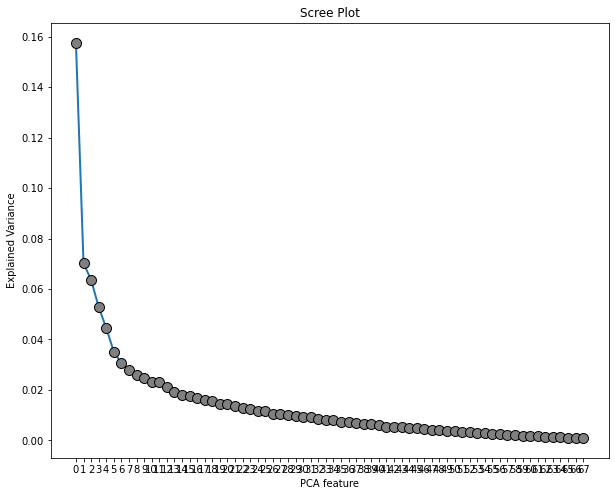

In [18]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None, 
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
personality_pca = pca.fit_transform(X_scaled)


# calling the scree_plot function to choose number of PC features
scree_plot(pca_object = pca)

#### Instantiating PCA object with new limit to PCs:

In [19]:
# INSTANTIATING a PCA object with limit = 6 to principal components
pca = PCA(n_components = 4, # set to 4 because they showed most variability in screening plot with 'None'
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
personality_pca = pca.fit_transform(X_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  personality_pca.shape)

Original shape: (137, 68)
PCA shape     : (137, 4)


## b) Evaluating PCA algorithm:

#### Printing out variance ratios. Checking they add up to 1:

In [20]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")
    
# NOTE: Sum of ratios amounts to 35%: explain 43% of total variability in data.

PC 1 : 0.158
PC 2 : 0.07
PC 3 : 0.064
PC 4 : 0.053


## c) PC Interpretation and Persona Development:

#### Analyzing factor loadings to interpret PC meaning through relations:

In [21]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(personality_scaled.columns)


# checking the result
display(factor_loadings_df.round(decimals = 3))


# saving to Excel
factor_loadings_df.to_excel('personality_factor_loadings.xlsx')

# showing descriptive statistics on factor loadings
factor_loadings_df.describe().round(decimals = 3)

<ipython-input-21-fe15bebc03cc>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


,0,1,2,3
Am the life of the party,-0.038,0.139,-0.249,-0.124
Feel little concern for others,0.097,0.058,-0.074,0.001
Am always prepared,-0.079,-0.059,-0.047,0.140
Get stressed out easily,0.016,0.257,0.035,0.066
Have a rich vocabulary,-0.116,-0.056,-0.081,0.137
Don't talk a lot,0.070,0.043,0.246,0.062
Am interested in people,-0.095,0.063,-0.009,-0.239
Leave my belongings around,0.067,0.108,-0.051,-0.141
Am relaxed most of the time,0.005,-0.085,-0.021,-0.104
Have difficulty understanding abstract ideas,0.083,0.144,0.048,-0.204


,0,1,2,3
count,68.000,68.000,68.000,68.000
mean,-0.046,0.079,0.006,-0.002
std,0.113,0.093,0.122,0.122
min,-0.212,-0.085,-0.261,-0.279
25%,-0.144,0.030,-0.072,-0.105
50%,-0.080,0.064,0.003,0.010
75%,0.074,0.124,0.070,0.088
max,0.145,0.341,0.295,0.208


**INSIGHTS:

----------

**Group 0: (factor loadings min-max: -0.212, 0.145) - 'THE UNBOTHERED'
- Very unlikely to: 
    - 'Resolve conflicts constructively' (-0.212)
    - 'Display a growth mindset' (-0.197)
    - 'Encourage direct and open discussions' (-0.196)
    - 'Take initiative even when circumstances, objectives, or rules aren't clear' (-0.192)
    - 'Work well with people from diverse cultural backgrounds' (-0.189)
    - 'Build cooperative relationships' (-0.186)
    - 'Coach teammates for performance and growth' (-0.180)
    - 'Respond effectively to multiple priorities' (-0.178)

- Very likely to: 
    - 'Am not interested in abstract ideas' (0.145)
    - 'Am easily disturbed' (0.133)
    - 'Shirk my duties' (0.124)
    - 'Have little to say' (0.116)
    - 'Am not really interested in others' (0.112)
    - 'Insult people' (0.106)
    - 'Am not interested in other people's problems' (0.102)

 
----------

**Group 1: (factor loadings min-max: -0.085, 0.341) - 'THE MESS'
-  Very unlikely to:
   - 'Am relaxed most of the time' (-0.085)
   - 'Feel comfortable around people' (-0.070)
   - 'Am always prepared' (-0.059)
   - 'Have a rich vocabulary' (-0.056)
   - 'Seldom feel blue' (-0.047)
   - 'Am quick to understand things' (-0.041)
 
- Very likely to:
   - 'Have frequent mood swings' (0.341)
   - 'Change my mood a lot' (0.309)
   - 'Get irritated easily' (0.267)
   - 'Often feel blue' (0.267)
   - 'Get upset easily' (0.263)
   - 'Get stressed out easily' (0.257)
   - 'Make a mess of things' (0.242)
   - 'Am easily disturbed' (0.202)
   - 'Worry about things' (0.198)
   - 'Shirk my duties' (0.188)

   
----------

**Group 2: (factor loadings min-max: -0.261, 0.295) - 'THE LISTENER' ## Analyst, backend developer
- Very unlikely to:
   - 'Start conversations' (-0.261)
   - 'Talk to a lot of different people at parties' (-0.253)
   - 'Am the life of the party' (-0.249)
   - 'Feel comfortable around people' (-0.170)
   - 'Often forget to put things back in their proper place' (-0.164)
   - 'Encourage direct and open discussions' (-0.153)
   - 'Insult people' (-0.122)
   
- Very likely to:
    - 'Am quiet around strangers' (0.295)
    - 'Keep in the background' (0.271)
    - 'Don't talk a lot' (0.246)
    - 'Listen carefully to others' (0.228)
    - 'Don't like to draw attention to myself' (0.199)
    - 'Don't persuasively sell a vision or idea' (0.176)
    - 'Worry about things' (0.164)
    - 'Pay attention to details' (0.159)


----------

**Group 3: (factor loadings min-max: -0.279, 0.208) - 'THE LONE WOLF'
-  Very unlikely to:
    - 'Feel comfortable around people' (-0.279)
    - 'Am interested in people' (-0.239)
    - 'Have a soft heart' (-0.207)
    - 'Have difficulty understanding abstract ideas' (-0.204)
    - 'Start conversations' (-0.183)
    
- Very likely to:
    - 'Get irritated easily' (0.208)
    - 'Get upset easily' (0.196)
    - 'Am not really interested in others' (0.184)
    - 'See underlying patterns in complex situations' (0.183)
    - 'Am quick to understand things' (0.166)
    - 'Use difficult words' (0.155)


#### Changing column names to reflect customer personas:

In [22]:
# naming each principal component
factor_loadings_df.columns = ['THE UNBOTHERED', 
                              'THE MESS',         
                              'THE LISTENER',
                              'THE LONE WOLF']         


'''
NOTICE: For each one of this groups, there's also the complete opposite group
(like in carnivores vs herbivores).
'''

# checking the result
factor_loadings_df

,THE UNBOTHERED,THE MESS,THE LISTENER,THE LONE WOLF
Am the life of the party,-0.037898,0.139175,-0.248604,-0.124392
Feel little concern for others,0.096565,0.057562,-0.074345,0.001007
Am always prepared,-0.079290,-0.059442,-0.046986,0.140442
Get stressed out easily,0.015621,0.256865,0.034920,0.066201
Have a rich vocabulary,-0.115506,-0.056244,-0.080598,0.137154
Don't talk a lot,0.069755,0.043066,0.245683,0.062238
Am interested in people,-0.095309,0.063106,-0.008775,-0.239246
Leave my belongings around,0.067494,0.107533,-0.051434,-0.141437
Am relaxed most of the time,0.004963,-0.084893,-0.020727,-0.104299
Have difficulty understanding abstract ideas,0.083303,0.143585,0.048208,-0.203547


In [23]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(personality_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_df.columns


# checking the results
X_pca_df

,THE UNBOTHERED,THE MESS,THE LISTENER,THE LONE WOLF
0,0.239483,-0.337788,0.104538,0.934758
1,0.076603,0.923420,1.565233,1.491863
2,3.479810,-4.030045,-2.981109,2.106387
3,-1.672796,4.240944,0.911523,-2.471500
4,5.315512,2.087080,-1.297715,-0.336590
5,4.547168,2.413810,1.788995,-0.013918
6,0.884541,2.421887,0.961859,0.922635
7,-1.888966,-2.801392,-1.475018,-0.571879
8,1.705578,-0.944060,1.084536,0.382861
9,-3.859096,-2.021336,-0.243318,1.828491


Sending results to excel:

In [24]:
X_pca_df.to_excel('./analysis_results/PCA Factor Loadings.xlsx',
                  index = False)

---------
---------
# Part III: Clustering

## a) Preparing Data:

Checking variance amongst clusters and, if not 1.0, rescaling data:

In [25]:
# checking variance amongst clusters
np.var(X_pca_df)

THE UNBOTHERED    10.715372
THE MESS           4.774447
THE LISTENER       4.327201
THE LONE WOLF      3.600268
dtype: float64

In [26]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['THE UNBOTHERED', 
                              'THE MESS',         
                              'THE LISTENER',
                              'THE LONE WOLF'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

THE UNBOTHERED    10.715372
THE MESS           4.774447
THE LISTENER       4.327201
THE LONE WOLF      3.600268
dtype: float64 


THE UNBOTHERED    1.0
THE MESS          1.0
THE LISTENER      1.0
THE LONE WOLF     1.0
dtype: float64


<ipython-input-26-6ad6a37ed51a>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-26-6ad6a37ed51a>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


## b) Agglomerative Clustering:

In [27]:
'''
# developing dendogram to decide on number of clusters using k-Means:

# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()
'''

"\n# developing dendogram to decide on number of clusters using k-Means:\n\n# grouping data based on Ward distance\nstandard_mergings_ward = linkage(y = pca_scaled,\n                                 method = 'ward',\n                                 optimal_ordering = True)\n\n\n# setting plot size\nfig, ax = plt.subplots(figsize=(12, 12))\n\n# developing a dendrogram\ndendrogram(Z = standard_mergings_ward,\n           leaf_rotation = 90,\n           leaf_font_size = 6)\n\n\n# saving and displaying the plot\nplt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')\nplt.show()\n"

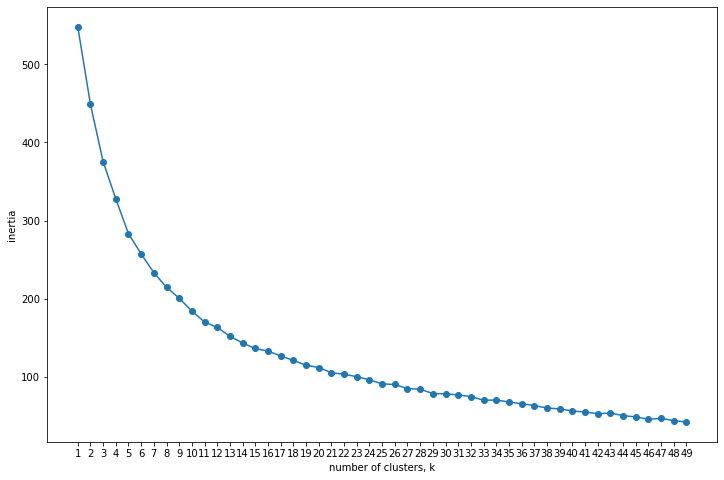

In [28]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [29]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    44
3    36
0    31
2    26
Name: Cluster, dtype: int64


In [30]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['THE UNBOTHERED', 
                              'THE MESS',         
                              'THE LISTENER',
                              'THE LONE WOLF'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,THE UNBOTHERED,THE MESS,THE LISTENER,THE LONE WOLF
0,1.12,-0.37,-0.46,0.45
1,-0.10,0.06,1.07,0.29
2,-0.94,0.04,-0.93,0.59
3,-0.16,0.22,-0.23,-1.17


In [31]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                        axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_demographic,
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?',
                              'What laptop would you buy in next assuming if all laptops cost the same?',
                              'What program are you in?', 
                              'What is your age?', 
                              'Gender',
                              'What is your nationality?', 
                              'What is your ethnicity?',
                              'Cluster',
                              'THE UNBOTHERED', 
                              'THE MESS',         
                              'THE LISTENER',
                              'THE LONE WOLF']


# checking the results
final_pca_clust_df.head(n = 10)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Cluster,THE UNBOTHERED,THE MESS,THE LISTENER,THE LONE WOLF
0,1,1,1,1,1,14,1,1,0.239483,-0.337788,0.104538,0.934758
1,0,0,2,1,0,14,1,1,0.076603,0.923420,1.565233,1.491863
2,0,0,2,1,0,1,2,0,3.479810,-4.030045,-2.981109,2.106387
3,0,0,2,1,1,1,2,3,-1.672796,4.240944,0.911523,-2.471500
4,1,0,4,1,0,2,4,0,5.315512,2.087080,-1.297715,-0.336590
5,1,1,1,0,0,1,2,1,4.547168,2.413810,1.788995,-0.013918
6,0,1,1,0,1,20,1,1,0.884541,2.421887,0.961859,0.922635
7,0,0,1,1,1,39,3,2,-1.888966,-2.801392,-1.475018,-0.571879
8,1,1,3,1,0,45,4,1,1.705578,-0.944060,1.084536,0.382861
9,0,2,3,1,0,33,1,2,-3.859096,-2.021336,-0.243318,1.828491


# Part IV: Analysis with Demographics

## a) Current Laptop

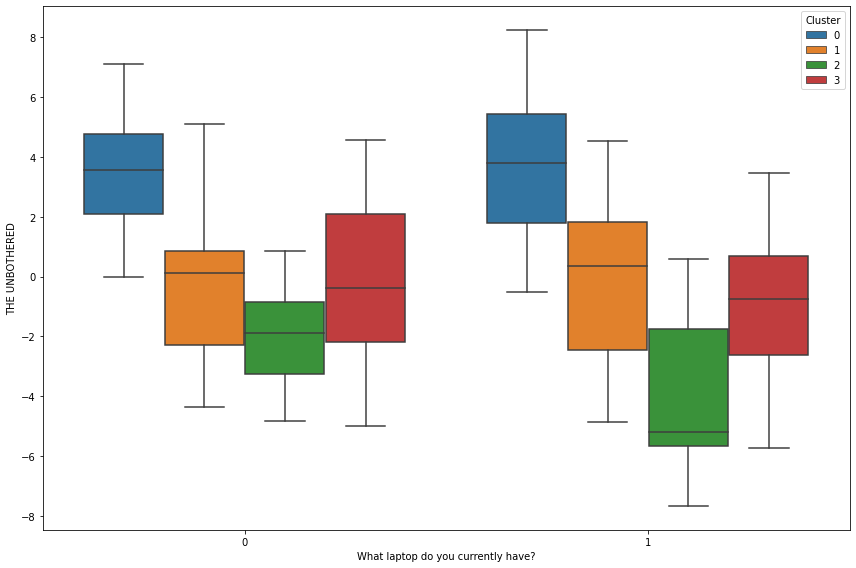


CONCLUSIONS:
19% of the Unbothered population prefers the flexibility offered by Windows (e.g. USB ports vs. just
thunderbolts in Macbook).



In [32]:
## Current Laptop ###

'''
#NOTE: 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
19% of the Unbothered population prefers the flexibility offered by Windows (e.g. USB ports vs. just
thunderbolts in Macbook).
''')

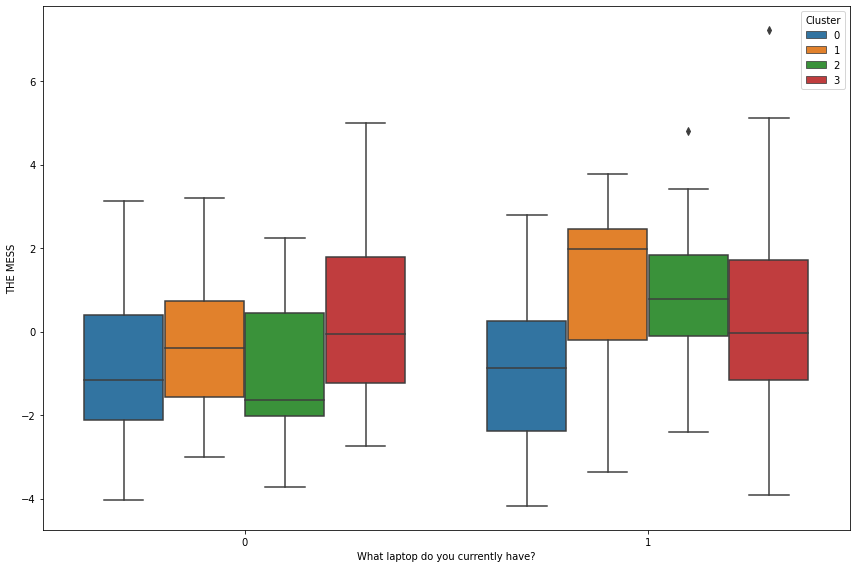


CONCLUSIONS:
51% of the Mess population prefers Macbook (clusters 1 and 2). Could be due to the iCloud
coordinating information amongst devices, as they are naturally not organized and get stressed easily,
so they would appreciate information being accessed easily and fast from any device.
They care about using the information not being lost, regardless of them not proactively
arranging it or saving it on their own.



In [33]:
## Current Laptop ###

'''
NOTE: 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'THE MESS',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
51% of the Mess population prefers Macbook (clusters 1 and 2). Could be due to the iCloud
coordinating information amongst devices, as they are naturally not organized and get stressed easily,
so they would appreciate information being accessed easily and fast from any device.
They care about using the information not being lost, regardless of them not proactively
arranging it or saving it on their own.
''')

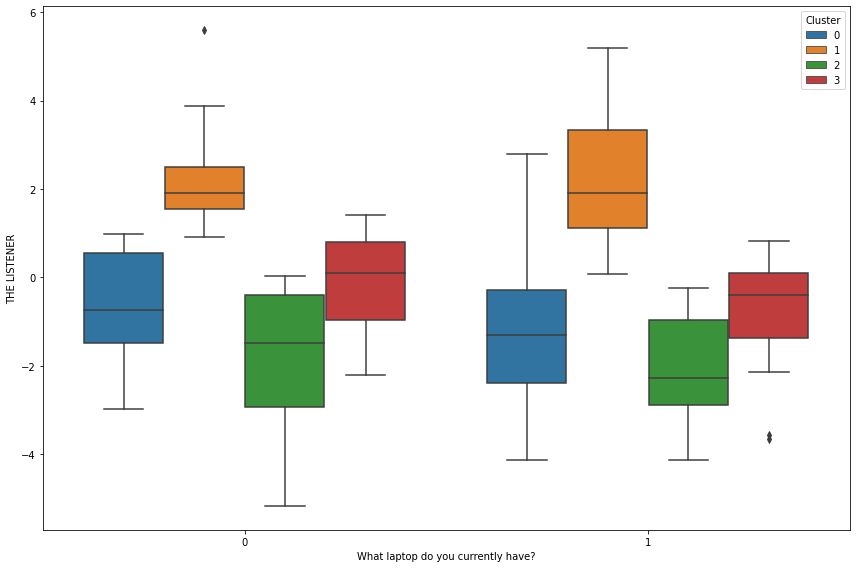


CONCLUSIONS:
Listeners in this case tend to not have a mind of their own, as is reflected in them
not havign a strong prefernce over Macbook or Windows.



In [34]:
## Current Laptop ###

'''
NOTE: 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'THE LISTENER',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Listeners, in this case, do not tend to have a mind of their own. The boxplot reflectes 
that they do not have a strong preference towards Macbook nor Windows. 
''')

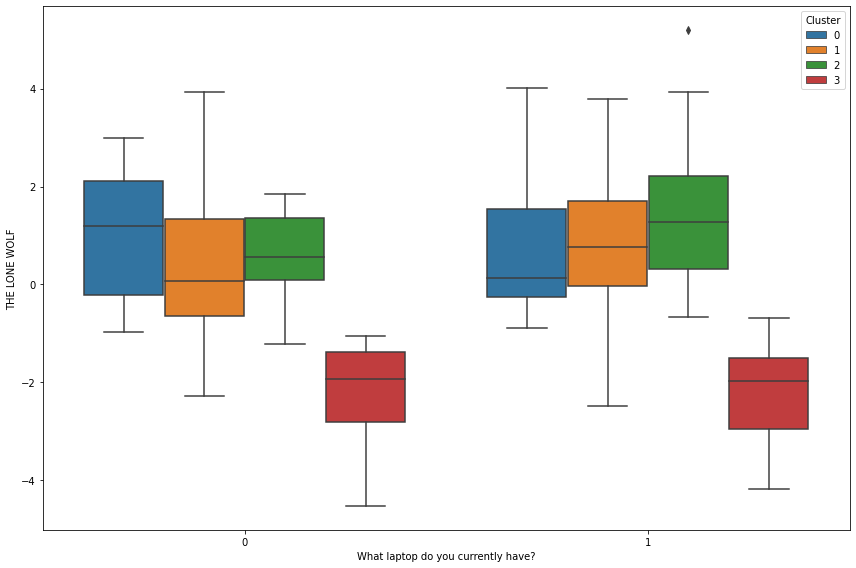


CONCLUSIONS:
26% of the population in the Lone Wolf (cluster 3) starting to deviate form the norm.



In [35]:
## Current Laptop ###

'''
NOTE: 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'THE LONE WOLF',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
26% of the population in the Lone Wolf (cluster 3) is starting to deviate from the norm.
''')

## b) Next Laptop

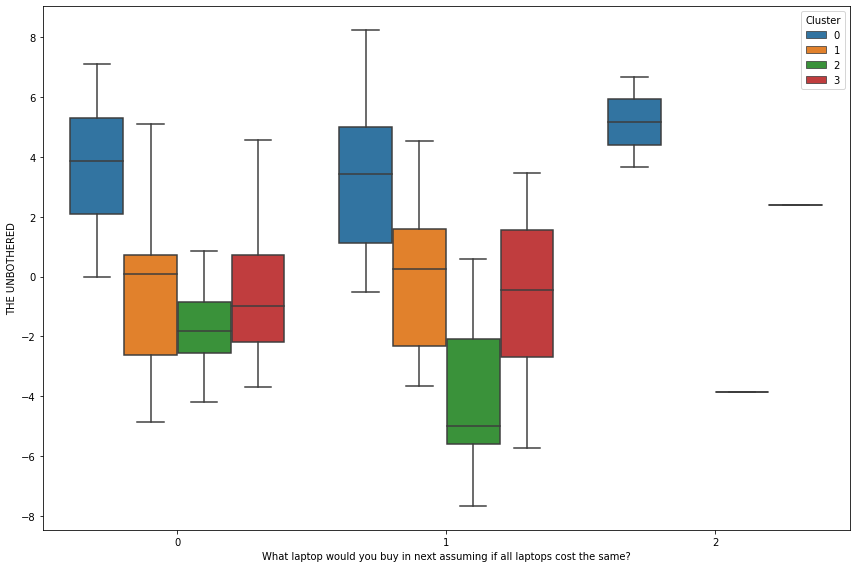


CONCLUSIONS:
Stronger diversity of opinions for Macbooks (higher variance). Since the Unbothered tend to
get stressed easily, this could be due to current dissatisfaction with their own laptop but
uncertainty as to what brand might solve that probelem (would it be worth it to repurchase a
Macbook, or would switching to another laptop make our life easier?).

77% of the Unbothered population would not consider buying a Chromebook.
The remaning 23% is so unbothered that buy what's convenient: get in, get out. It could also
be due to 26% of the population being older than average (see age boxplots), as the Chromebook
does not support Microsoft Office, gaming platforms, etc.



In [36]:
## Next Laptop ###

'''
NOTE: 'Chromebook' = 2, 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
There is a stronger diversity of opinion for Macbooks (higher variance). Since the Unbothered tend to
get stressed easily, this could be due to their dissatisfaction with their current laptop. However,
it is uncertain as to which brand might solve that problem. The question remains, if it would be worth it to repurchase a
Macbook, or would switching to another laptop make our life easier?

77% of the Unbothered population would not consider buying a Chromebook.
The remaning 23% is so unbothered that they simply buy what's convenient: get in, get out. It could also
be due to 26% of the population being older than average (see age boxplots), as the Chromebook
does not support Microsoft Office, gaming platforms, etc.
''')

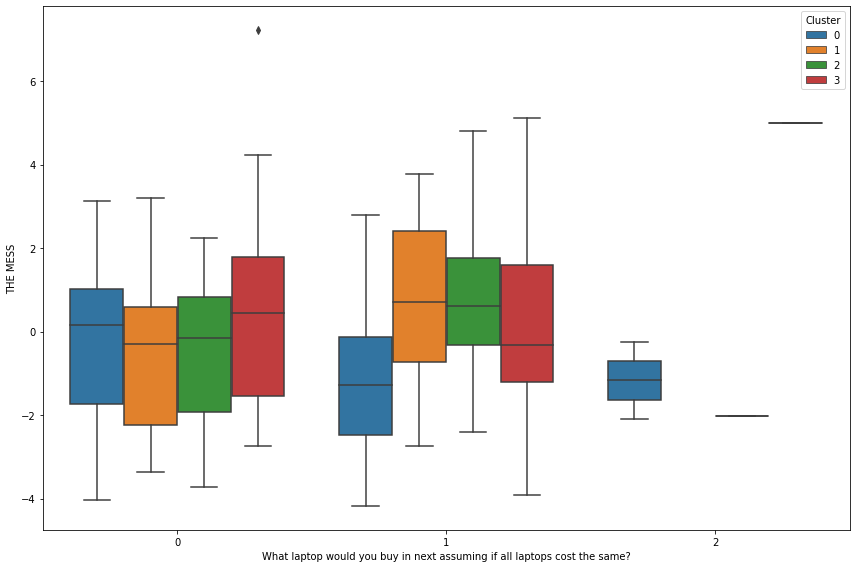


CONCLUSIONS:
No preference amongst future laptop types. This could be because they might be 
contemp with how their current laptop is organising their information but cannot think of better alternatives.
Additionally, the might not want to relearn how to operate on a new system (reorganize work, etc).

23% of the population would consider buying a Chromebook.
It could be due to 26% of the population being older than average (see age boxplots).



In [37]:
## Next Laptop ###

'''
NOTE: 'Chromebook' = 2, 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'THE MESS',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
No preference amongst future laptop types. This could be because they might be 
contempt with how their current laptop is organising their information but cannot think of better alternatives.
Additionally, they might not want to relearn how to operate on a new system (reorganize work, etc).

23% of the population would consider buying a Chromebook.
It could be due to 26% of the population being older than average (see age boxplots).
''')

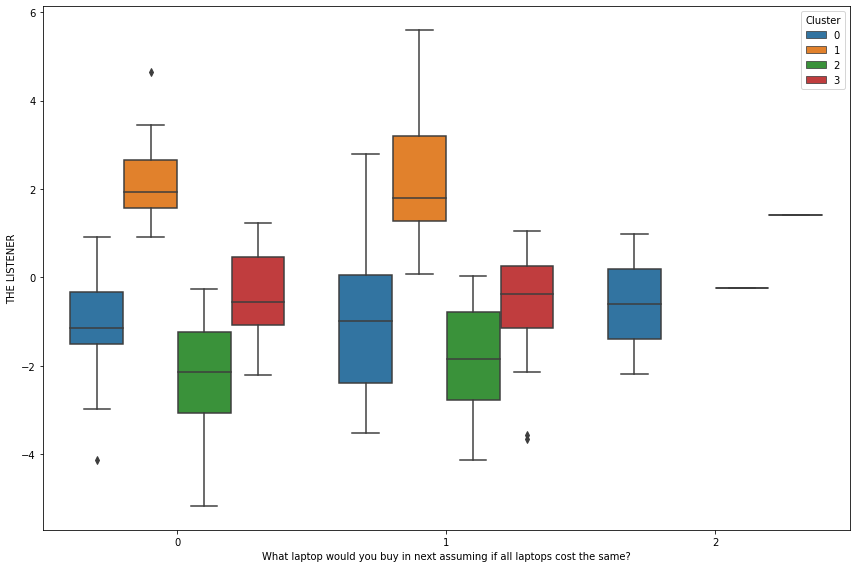


CONCLUSIONS:
Great variance amongst laptop preferences. Since the Listener follows trends rather than
deciding for him/herself, this could be due to their opinions being a representation of all 
of the other groups' preferences (which eventually converge to 0).

23% of the population would consider buying a Chromebook.
It could be due to 26% of the population being older than average (see age boxplots).



In [38]:
## Next Laptop ###

'''
NOTE: 'Chromebook' = 2, 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'THE LISTENER',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Great variance amongst laptop preferences. Since the Listener follows trends rather than
deciding for him/herself, this could be due to their opinions being a representation of all 
of the other groups' preferences and opinions (which eventually converge to 0).

23% of the population would consider buying a Chromebook.
It could be due to 26% of the population being older than average (see age boxplots).
''')

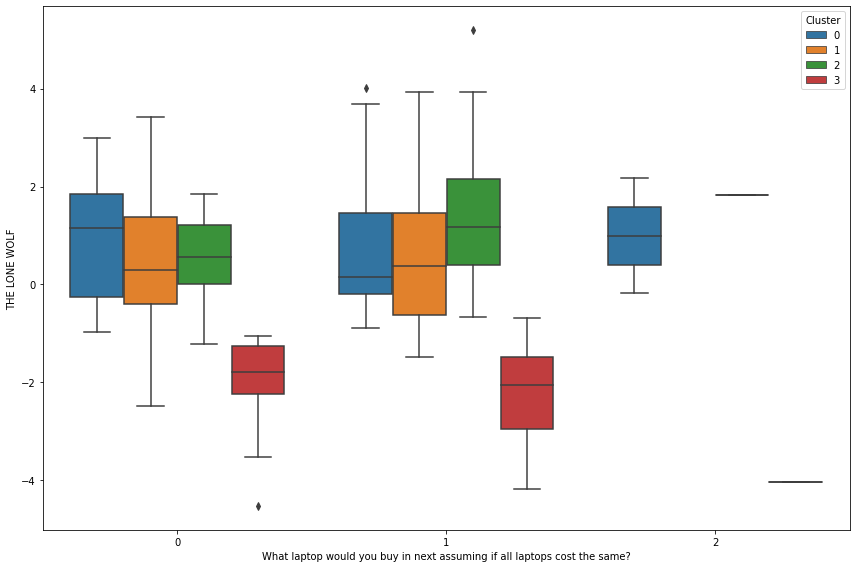


CONCLUSIONS:
This group does not show strong opinions for any laptop brand, but 26% does show
disatisfaction witht the performance of Macbook and Windows. This could represent, 
if generalized, overall satisfaction with both brands but still acknowledgement of
room for imporvement.

23% of the population would consider buying a Chromebook.
It could be due to 26% of the population being older than average (see age boxplots).



In [39]:
## Next Laptop ###

'''
NOTE: 'Chromebook' = 2, 'Macbook' = 1, 'Windows laptop' = 0
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'THE LONE WOLF',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
This group does not show strong opinions for any laptop brand, but 26% does show
disatisfaction with the performance of Macbook and Windows. This could represent, 
if generalized, an overall satisfaction with both brands but still acknowledgement of
room for imporvement.

23% of the population would consider buying a Chromebook.
It could be due to 26% of the population being older than average (see age boxplots).
''')

## c) Program

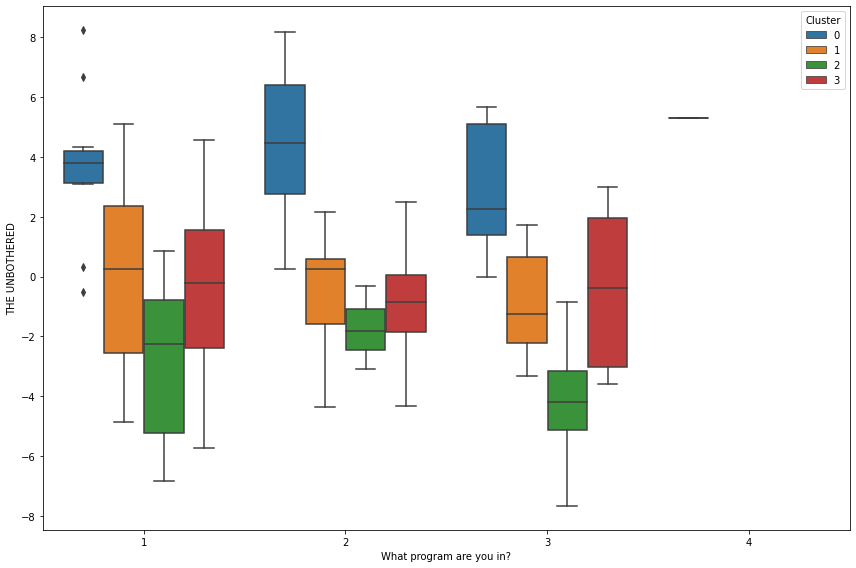


CONCLUSIONS:
Out of all of the Unbothered, practically none seem to be doing the MBA & DI combination.
However, they seem to be equally dispersed amongst the other programs, with a slight bias
for unlikelihood to choose MBA & MsBA.



In [40]:
## Program ##

'''
NOTE: 
'DD (MIB & Business Analytics)'    = 1, 
'One year Business Analytics'      = 2,
'DD (MBA & Business Analytics)'    = 3,
'DD (MBA & Disruptive innovation)' = 4

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Out of all of the Unbothered, practically none seem to be doing the MBA & DI combination.
However, they seem to be equally dispersed amongst the other programs, with a slight bias
for unlikelihood to choose MBA & MsBA.
''')

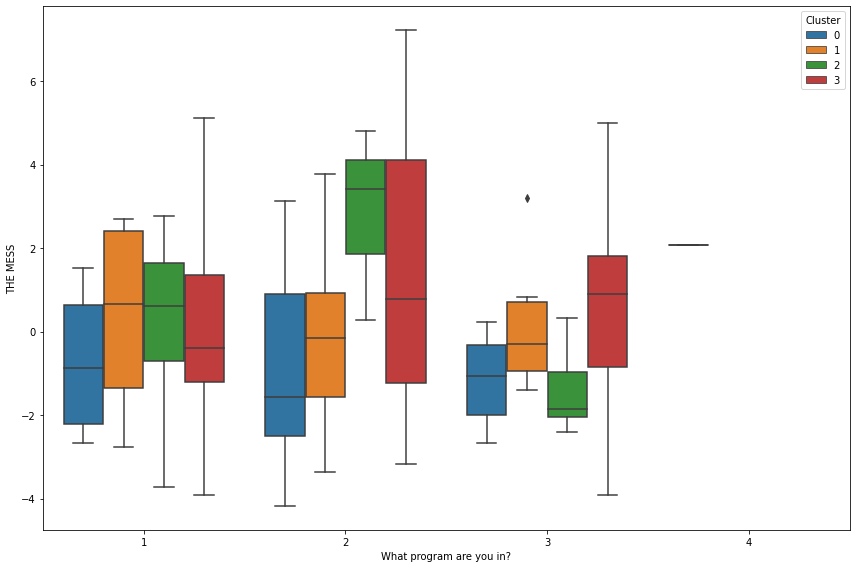


CONCLUSIONS:
The dispersion of the boxplots suggests the population of the Mess is less likely to be
enrolled in a MBA program. Most of them seem more likely to also have chosen just the 
One-Year MsBA, as opposed to the MIB & MsBA Dual Degree.



In [41]:
## Program ##

'''
NOTE: 
'DD (MIB & Business Analytics)'    = 1, 
'One year Business Analytics'      = 2,
'DD (MBA & Business Analytics)'    = 3,
'DD (MBA & Disruptive innovation)' = 4

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'THE MESS',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
The dispersion of the boxplots suggests the population of the Mess is less likely to be
enrolled in a MBA program. Most of them seem more likely to also have chosen just the 
One-Year MsBA, as opposed to the MIB & MsBA Dual Degree.
''')

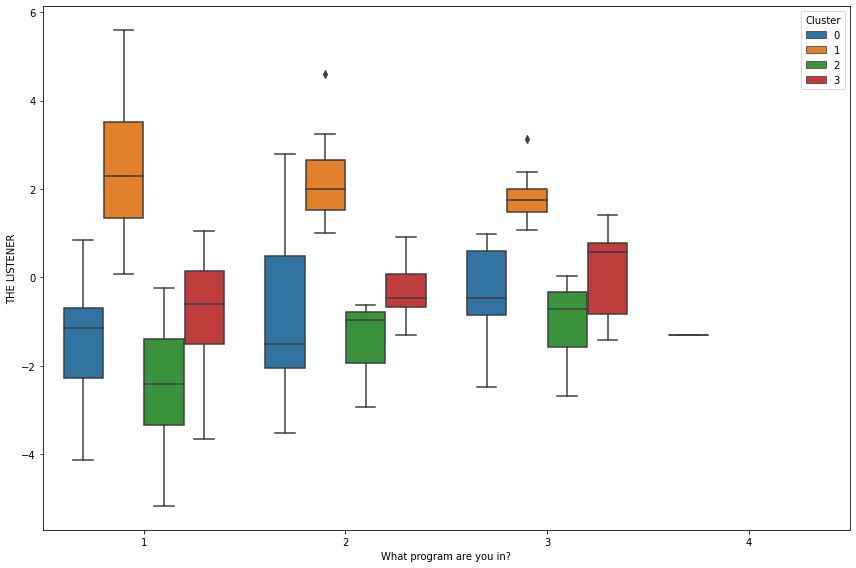


CONCLUSIONS:
Most clusters in the Listeners are more likely to choose the MBA & MsBA program, but
not likely at all to choose the MBA & DI program. This could be do to DI traditionally being
seen as requiring more initiative and creativity, as opposed to pure data analysis.

This is corroborated by a stronger preference towards the one-year MsBA, as opposed to the MIB & MsBA dual degree.




In [42]:
## Program ##

'''
NOTE: 
'DD (MIB & Business Analytics)'    = 1, 
'One year Business Analytics'      = 2,
'DD (MBA & Business Analytics)'    = 3,
'DD (MBA & Disruptive innovation)' = 4

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'THE LISTENER',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Most clusters in the Listeners are more likely to choose the MBA & MsBA program, but
not likely at all to choose the MBA & DI program. This could be do to DI traditionally being
seen as requiring more initiative and creativity, as opposed to pure data analysis.

This is corroborated by a stronger preference towards the one-year MsBA, as opposed to the MIB & MsBA dual degree.

''')

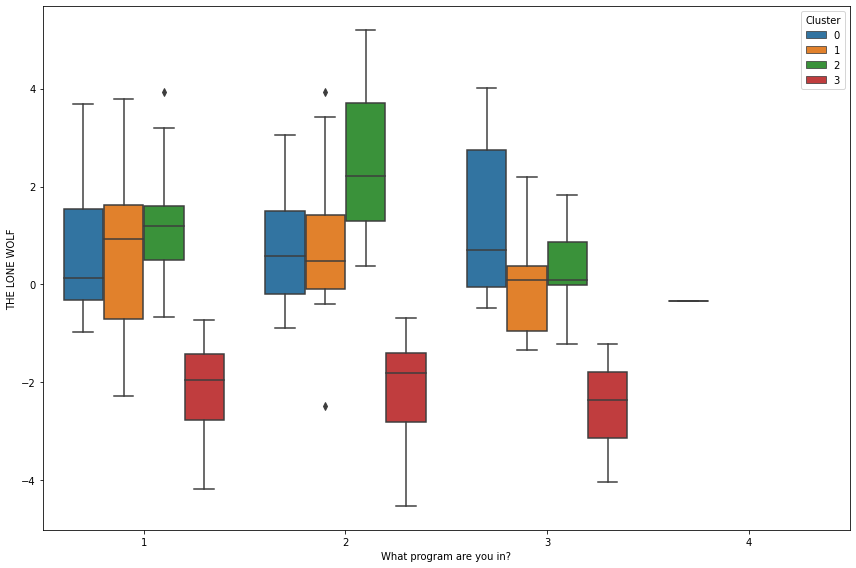


CONCLUSIONS:
Very unlikely to choose Disruptive Innovation, but equally as likely to choose between
any of the other programs containing Business Analytics (a traditionally known lone wolf
career path).



In [43]:
## Program ##

'''
NOTE: 
'DD (MIB & Business Analytics)'    = 1, 
'One year Business Analytics'      = 2,
'DD (MBA & Business Analytics)'    = 3,
'DD (MBA & Disruptive innovation)' = 4

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'THE LONE WOLF',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Very unlikely to choose Disruptive Innovation program, but equally likely to choose between
any of the other programs containing Business Analytics (a traditionally known lone wolf
career path).
''')

## d) Age

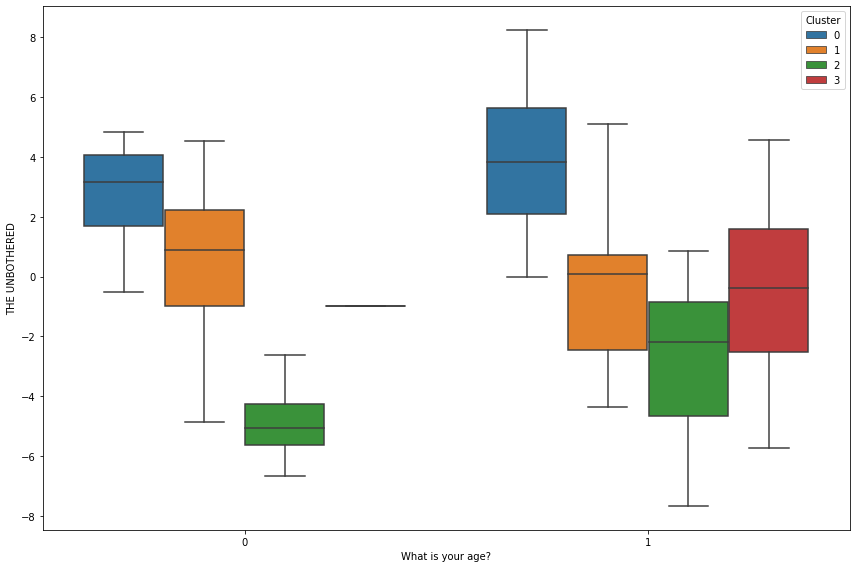


CONCLUSIONS:
26% (cluster 3) of the Unbothered population is old (on or above age average).



In [44]:
## Age ###

'''
NOTE: 
Below average              = 0
Above or queal to average  = 1
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your age?',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
26% (cluster 3) of the Unbothered population is old (on or above age average).
''')

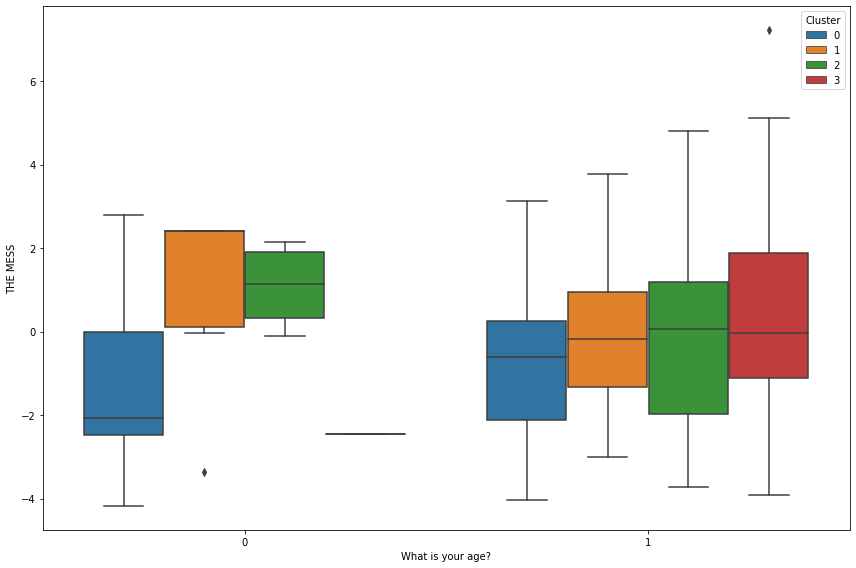


CONCLUSIONS:
26% (cluster 3) of the Mess population is old (on or above age average).



In [45]:
## Age ###

'''
NOTE: 
Below average              = 0
Above or queal to average  = 1
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your age?',
            y = 'THE MESS',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
26% (cluster 3) of the Mess population is old (on or above age average).
''')

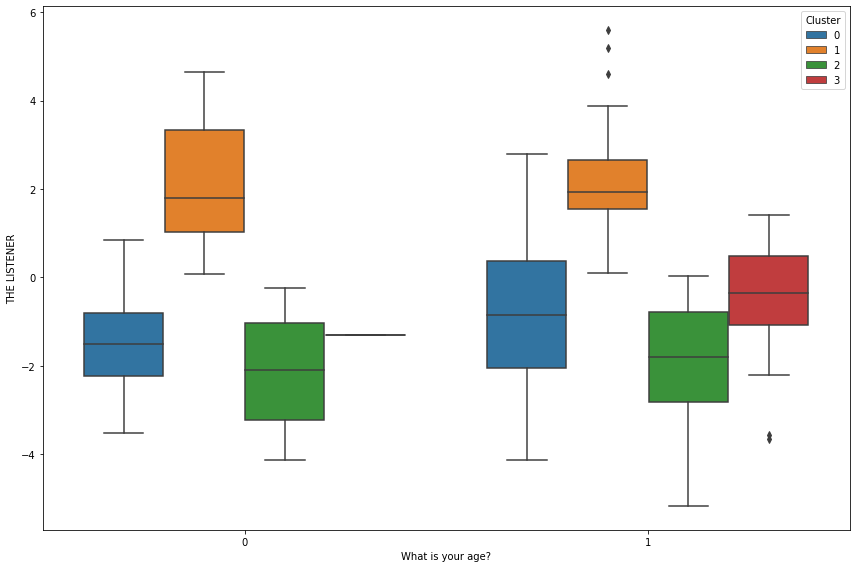


CONCLUSIONS:
26% (cluster 3) of the Listener population is old (on or above age average).



In [46]:
## Age ###

'''
NOTE: 
Below average              = 0
Above or queal to average  = 1
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your age?',
            y = 'THE LISTENER',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
26% (cluster 3) of the Listener population is old (on or above age average).
''')

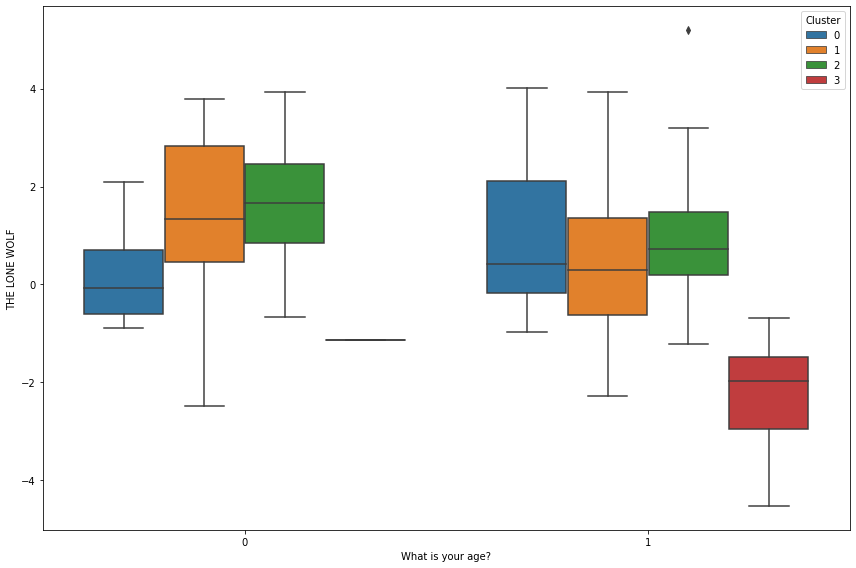


CONCLUSIONS:
26% (cluster 3) of the Lone Wolf population is old (on or above age average).



In [47]:
## Age ###

'''
NOTE: 
Below average              = 0
Above or queal to average  = 1
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your age?',
            y = 'THE LONE WOLF',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
26% (cluster 3) of the Lone Wolf population is old (on or above age average).
''')

## e) Gender

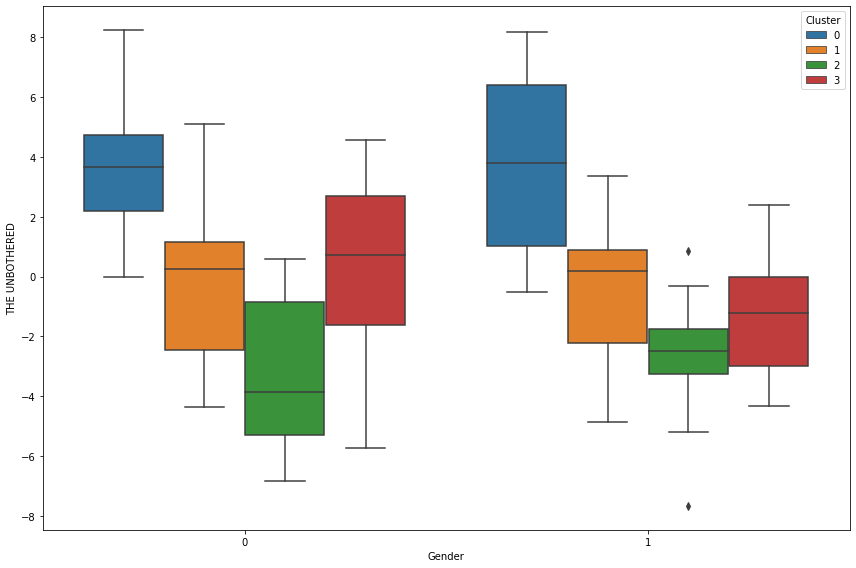


CONCLUSIONS:
Based on the boxplot trends it seems that the Unbothered are equally as likely to be men
as they are female (as the boxplot trend for cluster 2 suggests more females, but the
trend for cluster 3 suggests just as many more males).



In [48]:
## Gender ###

'''
NOTE: 'Male' = 0, 'Female' = 1

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Based on the boxplot trends it seems that the Unbothered are equally as likely to be men
as they are female (as the boxplot trend for cluster 2 suggests more females, but the
trend for cluster 3 suggests just as many more males).
''')

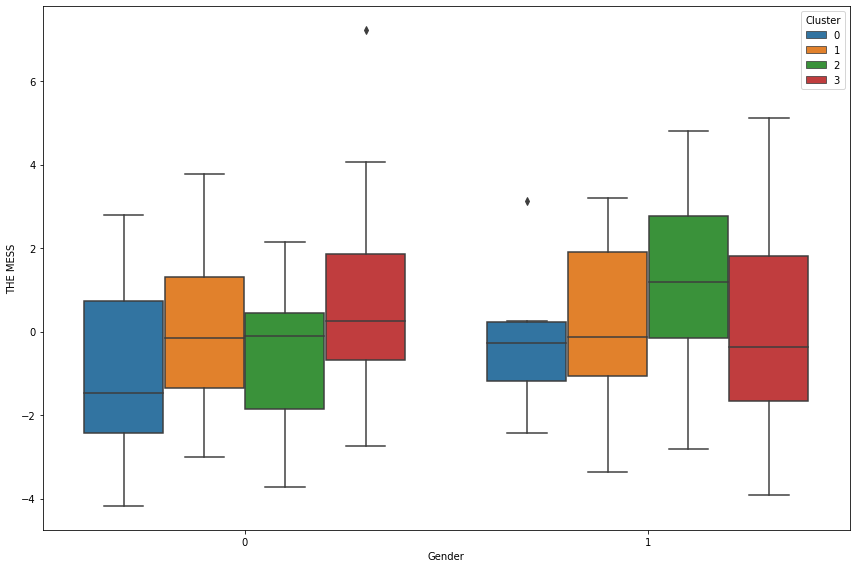


CONCLUSIONS:
In the Mess category, there seem to be slightly more females, which might suggest
higher stress levels in females according to the Mess personality traits.



In [49]:
## Gender ###

'''
NOTE: 'Male' = 0, 'Female' = 1

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'THE MESS',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
In the Mess category, there seems to be slightly more females, which might suggest
higher stress levels in females according to the Mess personality traits.
''')

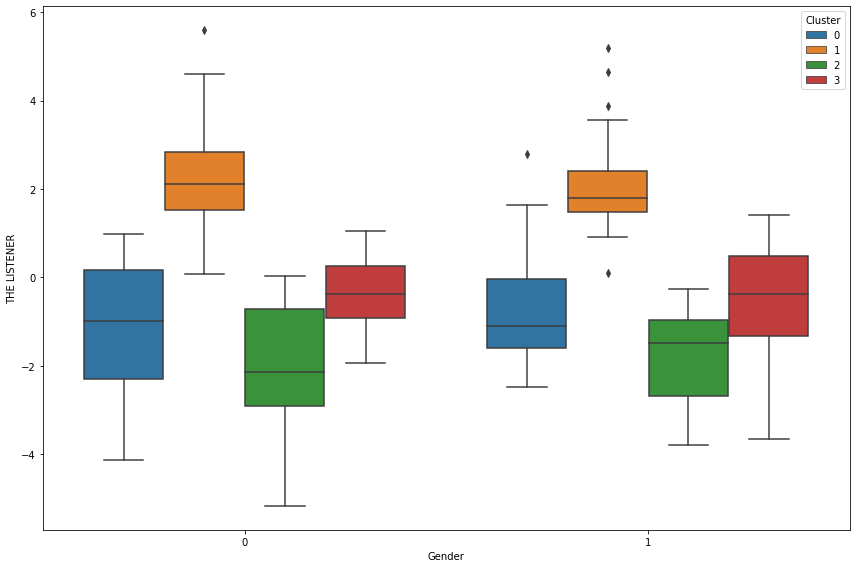


CONCLUSIONS:
Listeners are equally as likely to be male as they are females.



In [50]:
## Gender ###

'''
NOTE: 'Male' = 0, 'Female' = 1

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'THE LISTENER',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Listeners are equally likely to be male and female. No clear disitnction to be seen. 
''')

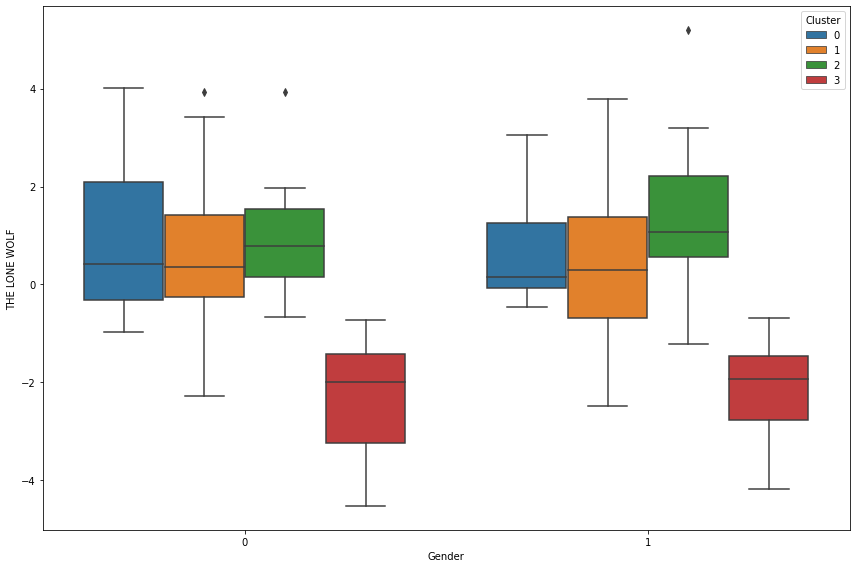


CONCLUSIONS:
Based on the cluster 2 boxplot trend, it seems Lone Wolves may be slightly more female than male,
which based on the PCA description might suggest that they may have less difficulty in 
finding underlying patterns in complex situations but may also get upset more often.




In [51]:
## Gender ###

'''
NOTE: 'Male' = 0, 'Female' = 1

'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'THE LONE WOLF',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Based on the cluster 2 boxplot trend, it seems Lone Wolves may be slightly more female than male,
which based on the PCA description might suggest that they may have less difficulty in 
finding underlying patterns in complex situations but may also get upset more often.

''')

## f) What is your nationality?

As can be seen in the code cell below, nationality boxplots were deemed not useful due to data dumping. Instead, we used ethnicity boxplots (see Part IV, section g).

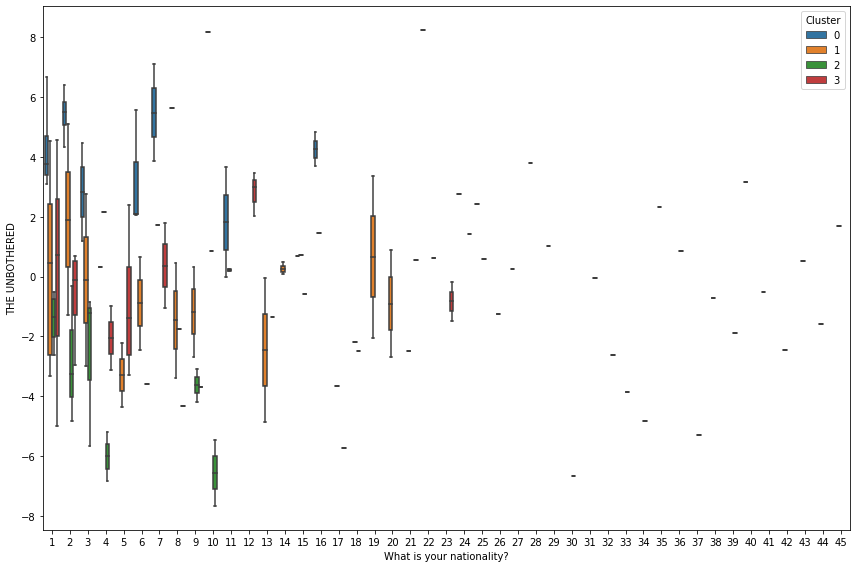

In [52]:
## Nationality ###

'''
NOTE: 
India              = 1
China              = 2
Germany            = 3
USA                = 4
Mexico             = 5
Peru               = 6
Brazil             = 7
Russia             = 8
Colombia           = 9
Nigeria            = 10
Korea              = 11
Taiwan             = 12
Italy              = 13
Ecuador            = 14
Norway             = 15
Indonesia          = 16
Vietnam            = 17
Czech Republic     = 18
Thailand           = 19
Dominican Republic = 20
Congo              = 21
Spain              = 22
Canada             = 23
Philippines        = 24
Turkey             = 25
Venezuela          = 26
Italy, Spain       = 27
N/A                = 28
Britain, India     = 29
Portugal           = 30
Kyrgyz             = 31
Germany, USA       = 32
Costa Rica         = 33
Belgium            = 34
Belarus            = 35
Panama             = 36
UK                 = 37
Kenya              = 38
Switzerland        = 39
Ukraine            = 40
Pakistan           = 41
Mauritius          = 42
Uganda             = 43
Ghana              = 44
Japan              = 45
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your nationality?',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

print("Proven not useful (data dumping). Instead, we used ethnicity boxplots (see Part IV, section g)")

## g) What is your ethnicity?

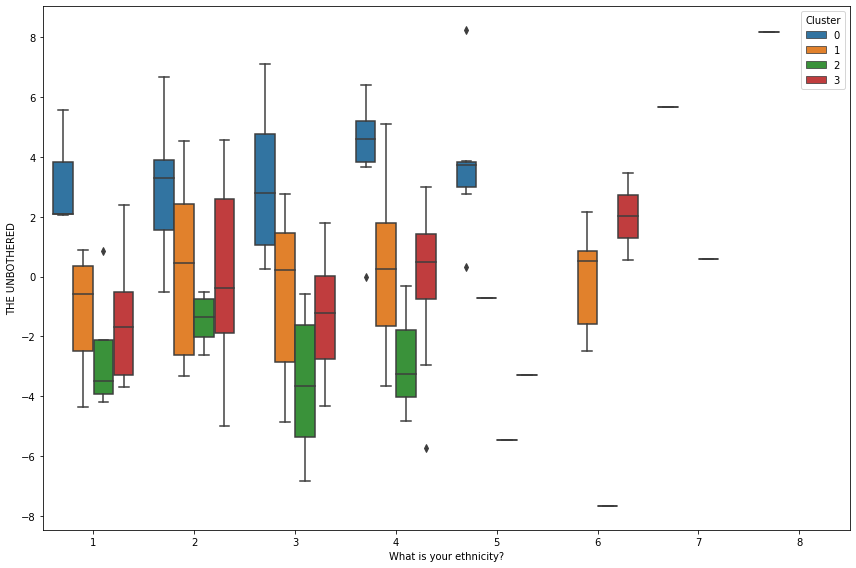


CONCLUSIONS:
Based on the graph median lines, it may seen that ethnicity 6 (African Americans) may have
a larger representation in the Unbothered group as oppose to the rest of the ethnicites. 
However, these resulsts may not be representative of the entire populations, as there were for
example only 8 respondents for ethnicity 6 as opposed to 36 for ethnicity 1.



In [53]:
## Ethnicity ###

'''
NOTE: 
'Hispanic / Latino'    = 1
'West Asian / Indian'  = 2
'White / Caucasian'    = 3
'Far east Asian'       = 4
'Prefer not to answer' = 5
'African American'     = 6
'Middle Eastern'       = 7
'Native American'      = 8
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'THE UNBOTHERED',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Based on the graph median lines, it may seen that ethnicity 6 (African Americans) may have
a larger representation in the Unbothered group as oppose to the rest of the ethnicites. 
However, these resulsts may not be representative of the entire populations, as there were for
example only 8 respondents for ethnicity 6 as opposed to 36 for ethnicity 1.
''')

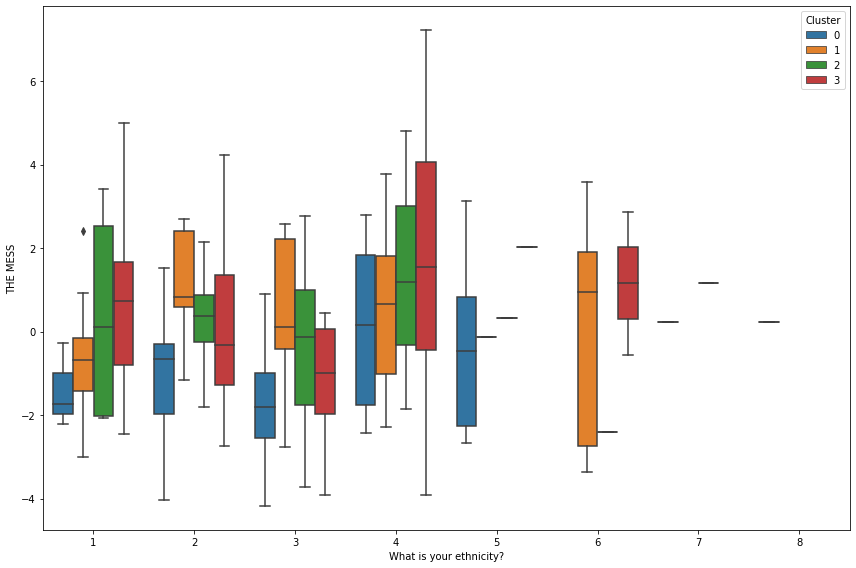


CONCLUSIONS:
Based on the graph median lines, it may seen that ethnicity 4 (Far east Asian) is more
likely to in the Mess category, since all the boxplot medians are above 0.



In [54]:
## Ethnicity ###

'''
NOTE: 
'Hispanic / Latino'    = 1
'West Asian / Indian'  = 2
'White / Caucasian'    = 3
'Far east Asian'       = 4
'Prefer not to answer' = 5
'African American'     = 6
'Middle Eastern'       = 7
'Native American'      = 8
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'THE MESS',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Based on the median lines in the graph, it may seem that ethnicity 4 (Far east Asian) is more
likely to in the Mess category, since all the boxplot medians are above 0.
''')

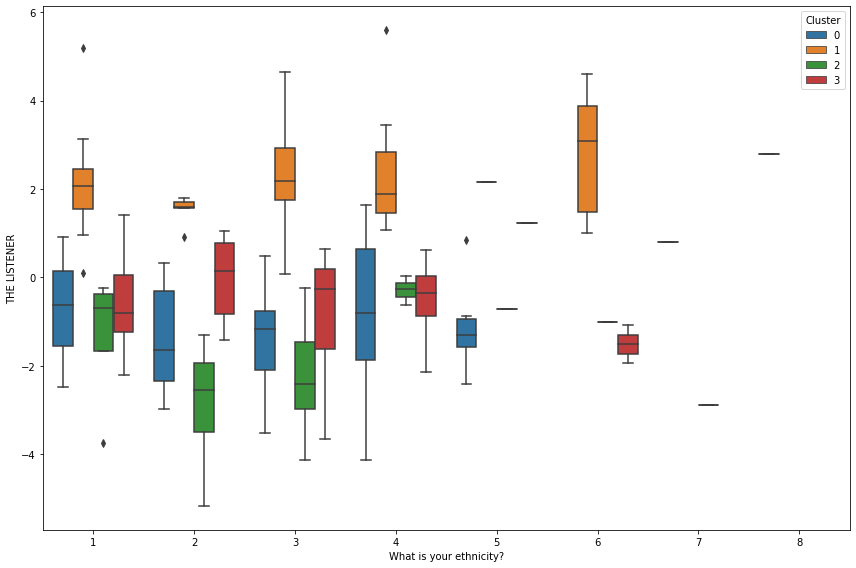


CONCLUSIONS:
Based on the graph median lines, it may seen that ethnicity 2 (West Asian/Indian) is less
likely to listen. Meanwhile, ethnicities 1, 4 and 6 seem to fit better with the Listener profile
than other ethnicities (Hispanic/Latino, Far east Asian and African American, respectively).



In [55]:
## Ethnicity ###

'''
NOTE: 
'Hispanic / Latino'    = 1
'West Asian / Indian'  = 2
'White / Caucasian'    = 3
'Far east Asian'       = 4
'Prefer not to answer' = 5
'African American'     = 6
'Middle Eastern'       = 7
'Native American'      = 8
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'THE LISTENER',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Based on the median lines in the graph, it may seem that ethnicity 2 (West Asian/Indian) is less
likely to listen. Meanwhile, ethnicities 1, 4 and 6 seem to fit better with the Listener profile
than other ethnicities (Hispanic/Latino, Far east Asian and African American, respectively).
''')

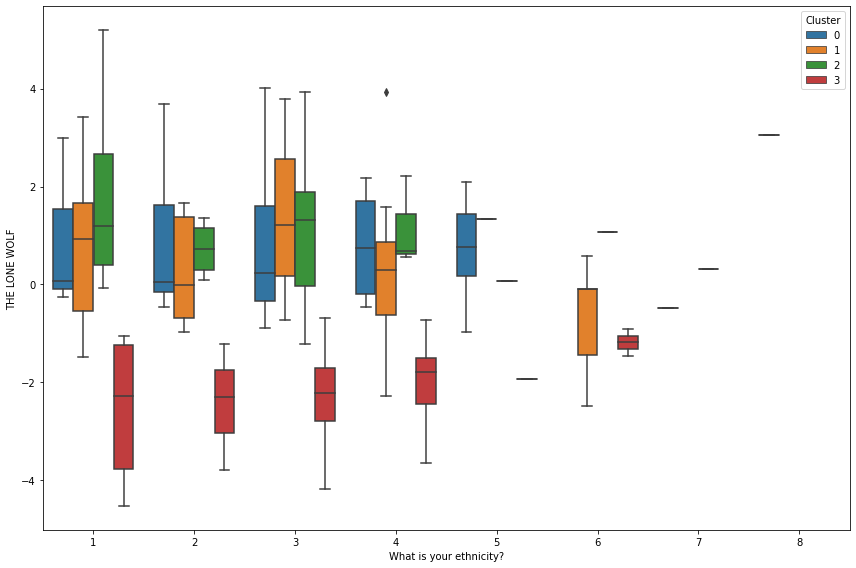


CONCLUSIONS:
Based on the graph aggregate median lines, it seems on average ethnicity 3 (White / Caucasian)
might be the most propense to be Lone Wolfs (work analytically, independently and stressed).
Meanwhile, ethnicity 6 are less likely to be so (African American).



In [56]:
## Ethnicity ###

'''
NOTE: 
'Hispanic / Latino'    = 1
'West Asian / Indian'  = 2
'White / Caucasian'    = 3
'Far east Asian'       = 4
'Prefer not to answer' = 5
'African American'     = 6
'Middle Eastern'       = 7
'Native American'      = 8
'''

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'THE LONE WOLF',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# printing out conclusions
print(f'''
CONCLUSIONS:
Based on the aggregate median lines in the graph, it seems that on average ethnicity 3 (White / Caucasian)
might be the most propense to be Lone Wolfs (work analytically, independently and stressed).
Meanwhile, ethnicity 6 are less likely to be so (African American).
''')

# Part V: Key Insights and Conclusions

### Key Summary Results:

In [57]:
# concatenating final_pca_clust_df with survey_categorical
summary_pca_df = pd.concat([final_pca_clust_df,
                         survey_categorical],
                        axis = 1)

# creating pivot table for current laptop usage with degree
display(pd.pivot_table(summary_pca_df,
              index = ['What laptop do you currently have?',
                      'What program are you in?'],
              values = ['surveyID'],
              aggfunc = len))


# creating pivot table for current laptop usage with ethnicity
pd.pivot_table(summary_pca_df,
              index = ['What laptop do you currently have?',
                      'What is your ethnicity?'],
              values = ['surveyID'],
              aggfunc = len)


surveyID
What laptop do you currently have? What program are you in?          
0                                  1                               25
                                   2                               21
                                   3                               22
1                                  1                               41
                                   2                               15
                                   3                               12
                                   4                                1

surveyID
What laptop do you currently have? What is your ethnicity?          
0                                  1                              19
                                   2                              15
                                   3                              14
                                   4                              12
                                   5                               4
                                   6                               3
                                   7                               1
1                                  1                               6
                                   2                              10
                                   3                              24
                                   4                              17
                                   5                               5
                                   6                               5
                                   7                               1
                                   8                               1

Based on the four customer personas we identified, we could find out that:

**THE UNBOTHERED:
- In terms of BIG FIVE EPRSONALITY TRAITS, they tend to score low for (1) openness, (2) conscientiousness, (3) extraversion and (4) agreeableness and high on (5) neuroticism.
- In terms of Hult DNA, none of the PCA features were significant enough to draw solid conclusions.
- Other demographic analysis seemed to suggest that these customers prefer Windows laptops over Macbooks. They also tend to be enrolled in MsBA programs, be older than average, female and African American.

**THE MESS:
- In terms of the BIG FIVE PERSONALITY TRAITS they tend to score low for (1) conscientiousness and (2) extraversion and high for (3) neuroticism.
- In terms of Hult DNA, no strong conclusions were reached.
- Demographics-wise, they tend to prefer Macbooks and MIB and/or MsBA courses. They tend to be older than average, female and Far East Asian.

**THE LISTENER:
- In terms of the BIG FIVE PERSONALITY TRAITS they tend to score high for (1) conscientiousness and (2) neuroticism and low for (3) extraversion.
- In terms of Hult DNA, they have low (1) communicating and (2) team building skills.
- Demographics-wise, they are preferably enrolled in MBA and/or MsBA courses, are older than average, female and either Hispanic/Latino or Far east Asian or African American.

**THE LONE WOLF:
- In terms of the BIG FIVE PERSONALITY TRAITS, they tend to score high in (1) openness and (2) neuroticism and low in (3) agreeableness.
- In terms of Hult DNA, they had high thinking skills.
- Demographics-wise, they tend to pursue MsBA degrees, be younger than average, female and White/Caucasian.

Thus, in conclusion, there was no clear indication found in our analysis that the Big Five personality traits corresponds with buying any particular laptops. Nor do the HULT DNA traits provide a clearly defined line to which certain customers can be identified in their purchase behavior. However, the analysis has revealed other characteristics which may influence the purchasing behaviour of certain personas towards certain laptops. The trends highlighted above ultimately suggest that most people who buy a Macbook are: neurotic, study MIB & Business Anlaytics and are White/Caucasian. Meanwhile, those who buy Windows laptops tend to also be neurotic but are spread more equally amongst degrees and ethnicities.